In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import time

import dcgan

set discriminator hidden layer size

In [2]:
hidden_layer1_size = 3
hidden_layer2_size = 3

In [3]:
def quad_fn(x):
    return 4 * x**2 - 13

def quad_inv_fn(y):
    return np.sqrt((y + 13) / 4)

generate data

In [4]:
x = np.random.rand(4000)[np.newaxis, :]
y = quad_fn(x)
x_train_o = np.concatenate((x, y)).T.astype('float32')

In [5]:
x_train_o

array([[  0.88085145,  -9.896403  ],
       [  0.5221537 , -11.909422  ],
       [  0.10151329, -12.95878   ],
       ...,
       [  0.70254725, -11.025709  ],
       [  0.23771067, -12.773974  ],
       [  0.04054836, -12.993423  ]], dtype=float32)

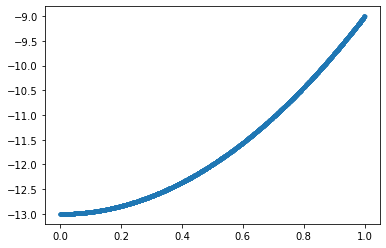

In [6]:
plt.plot(x_train_o[:, 0], x_train_o[:, 1], '.')

preprocessing

In [7]:
x_min = x_train_o[:, 0].min()
x_max = x_train_o[:, 0].max()
y_min = x_train_o[:, 1].min()
y_max = x_train_o[:, 1].max()

x_train = np.zeros(x_train_o.shape, dtype='float32')

x_train[:, 0] = (x_train_o[:, 0] - x_min) / (x_max - x_min)
x_train[:, 1] = (x_train_o[:, 1] - y_min) / (y_max - y_min)

# x_train = np.concatenate((x, y)).T

In [8]:
x_train = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0], reshuffle_each_iteration=True).batch(128)

# Model architecture

In [9]:
latent_dim = 1

class MyDCGAN(dcgan.DCGAN):
    def make_generator(self):
        return keras.Sequential([
            layers.InputLayer((latent_dim,)),
            
            layers.Dense(3),
            layers.LeakyReLU(),
            
            layers.Dense(3),
            layers.LeakyReLU(),
            
            layers.Dense(2),
            layers.Activation('sigmoid')
        ])
    
    def make_discriminator(self):
        return keras.Sequential([
            layers.InputLayer((2,)),
            
            layers.Dense(hidden_layer1_size),
            layers.LeakyReLU(),
            
            layers.Dense(hidden_layer2_size),
            layers.LeakyReLU(),
            
            layers.Dense(2),
            layers.LeakyReLU(),
            
            layers.Dense(1),
            layers.Activation('sigmoid'),
        ])

In [10]:
class ShowImage(keras.callbacks.Callback):
    def __init__(self, seed, interval=10):
        super().__init__()
        self.seed = seed
        self.interval = interval
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.interval != 0:
            return
        
        gen = self.model.generator(seed).numpy()
        gen[:, 0] = (gen[:, 0] * (x_max - x_min)) + x_min
        gen[:, 1] = (gen[:, 1] * (y_max - y_min)) + y_min
        
        plt.figure(figsize=(1.5, 1.5))
        plt.plot(x_train_o[:, 0], x_train_o[:, 1], '.')
        plt.plot(gen[:, 0], gen[:, 1], '.')
        plt.show()

In [11]:
gan = MyDCGAN(latent_dim)
gan.compile(
    gen_opt=keras.optimizers.Adam(0.001),
    disc_opt=keras.optimizers.Adam(0.001),
    loss_fn=keras.losses.BinaryCrossentropy(),
    run_eagerly=True
)

In [12]:
# import importlib
# importlib.reload(dcgan)

In [13]:
seed = tf.random.normal((16, latent_dim))

Epoch 1/20000
32/32 [==============================] - ETA: 0s - gen_loss: 0.6876 - disc_loss: 0.7092

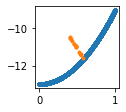

32/32 [==============================] - 2s 18ms/step - gen_loss: 0.6876 - disc_loss: 0.7092
Epoch 2/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7174 - disc_loss: 0.7002
Epoch 3/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7249 - disc_loss: 0.6939
Epoch 4/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7334 - disc_loss: 0.6868
Epoch 5/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7515 - disc_loss: 0.6789
Epoch 6/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7707 - disc_loss: 0.6702
Epoch 7/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7810 - disc_loss: 0.6645
Epoch 8/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7758 - disc_loss: 0.6677
Epoch 9/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7467 - disc_loss: 0.6765
Epoch 10/20000
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7076 - disc_loss: 0.6851
Epoch 78/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7075 - disc_loss: 0.6846
Epoch 79/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7033 - disc_loss: 0.6867
Epoch 80/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6945 - disc_loss: 0.6917
Epoch 81/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6854 - disc_loss: 0.6974
Epoch 82/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6818 - disc_loss: 0.7002
Epoch 83/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6820 - disc_loss: 0.7005
Epoch 84/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6827 - disc_loss: 0.7000
Epoch 85/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6842 - disc_loss: 0.6991
Epoch 86/20000
32/32 [==============================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6887 - disc_loss: 0.6955
Epoch 154/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6875 - disc_loss: 0.6959
Epoch 155/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6860 - disc_loss: 0.6960
Epoch 156/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6854 - disc_loss: 0.6961
Epoch 157/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6850 - disc_loss: 0.6960
Epoch 158/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6844 - disc_loss: 0.6960
Epoch 159/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6848 - disc_loss: 0.6956
Epoch 160/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6848 - disc_loss: 0.6952
Epoch 161/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6853 - disc_loss: 0.6946
Epoch 162/20000
32/32 [=====================

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6811 - disc_loss: 0.6999
Epoch 230/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6836 - disc_loss: 0.6975
Epoch 231/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6862 - disc_loss: 0.6952
Epoch 232/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6886 - disc_loss: 0.6927
Epoch 233/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6911 - disc_loss: 0.6901
Epoch 234/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6936 - disc_loss: 0.6873
Epoch 235/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6963 - disc_loss: 0.6846
Epoch 236/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6985 - disc_loss: 0.6819
Epoch 237/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7004 - disc_loss: 0.6797
Epoch 238/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6851 - disc_loss: 0.6983
Epoch 306/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6866 - disc_loss: 0.6966
Epoch 307/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6884 - disc_loss: 0.6950
Epoch 308/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6899 - disc_loss: 0.6933
Epoch 309/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6915 - disc_loss: 0.6916
Epoch 310/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6932 - disc_loss: 0.6898
Epoch 311/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6952 - disc_loss: 0.6877
Epoch 312/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6974 - disc_loss: 0.6855
Epoch 313/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7000 - disc_loss: 0.6828
Epoch 314/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7436 - disc_loss: 0.6497
Epoch 382/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7402 - disc_loss: 0.6523
Epoch 383/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7259 - disc_loss: 0.6638
Epoch 384/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7071 - disc_loss: 0.6808
Epoch 385/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6893 - disc_loss: 0.6978
Epoch 386/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6755 - disc_loss: 0.7113
Epoch 387/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6659 - disc_loss: 0.7206
Epoch 388/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6591 - disc_loss: 0.7268
Epoch 389/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6565 - disc_loss: 0.7289
Epoch 390/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7037 - disc_loss: 0.6844
Epoch 458/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6804 - disc_loss: 0.7036
Epoch 459/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6647 - disc_loss: 0.7244
Epoch 460/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6535 - disc_loss: 0.7280
Epoch 461/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6611 - disc_loss: 0.6705
Epoch 462/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7547 - disc_loss: 0.6587
Epoch 463/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7598 - disc_loss: 0.6996
Epoch 464/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7387 - disc_loss: 0.7129
Epoch 465/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7116 - disc_loss: 0.7079
Epoch 466/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7017 - disc_loss: 0.7024
Epoch 534/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7123 - disc_loss: 0.7022
Epoch 535/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7238 - disc_loss: 0.6969
Epoch 536/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7322 - disc_loss: 0.6897
Epoch 537/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7360 - disc_loss: 0.6837
Epoch 538/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7419 - disc_loss: 0.6843
Epoch 539/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7353 - disc_loss: 0.6856
Epoch 540/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7136 - disc_loss: 0.6897
Epoch 541/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7019 - disc_loss: 0.6966
Epoch 542/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6864 - disc_loss: 0.6877
Epoch 610/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6893 - disc_loss: 0.6891
Epoch 611/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6910 - disc_loss: 0.6878
Epoch 612/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6911 - disc_loss: 0.6871
Epoch 613/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6946 - disc_loss: 0.6870
Epoch 614/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6967 - disc_loss: 0.6870
Epoch 615/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6994 - disc_loss: 0.6901
Epoch 616/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6913 - disc_loss: 0.6977
Epoch 617/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6885 - disc_loss: 0.7081
Epoch 618/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7073 - disc_loss: 0.6945
Epoch 686/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7090 - disc_loss: 0.6929
Epoch 687/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7076 - disc_loss: 0.6920
Epoch 688/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7033 - disc_loss: 0.6919
Epoch 689/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6983 - disc_loss: 0.6930
Epoch 690/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6945 - disc_loss: 0.6940
Epoch 691/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6903 - disc_loss: 0.6945
Epoch 692/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6877 - disc_loss: 0.6945
Epoch 693/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6859 - disc_loss: 0.6943
Epoch 694/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6889 - disc_loss: 0.6859
Epoch 762/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6915 - disc_loss: 0.6848
Epoch 763/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6935 - disc_loss: 0.6849
Epoch 764/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6938 - disc_loss: 0.6883
Epoch 765/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6923 - disc_loss: 0.6948
Epoch 766/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6874 - disc_loss: 0.7031
Epoch 767/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6954 - disc_loss: 0.7079
Epoch 768/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7037 - disc_loss: 0.7035
Epoch 769/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7112 - disc_loss: 0.6974
Epoch 770/20000
32/32 [=====================

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7132 - disc_loss: 0.6823
Epoch 838/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7034 - disc_loss: 0.6889
Epoch 839/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6969 - disc_loss: 0.6936
Epoch 840/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6919 - disc_loss: 0.6978
Epoch 841/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6831 - disc_loss: 0.6998
Epoch 842/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6809 - disc_loss: 0.7030
Epoch 843/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6777 - disc_loss: 0.7028
Epoch 844/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6773 - disc_loss: 0.7024
Epoch 845/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6776 - disc_loss: 0.7018
Epoch 846/20000
32/32 [=====================

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6854 - disc_loss: 0.6944
Epoch 914/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6953 - disc_loss: 0.6851
Epoch 915/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7068 - disc_loss: 0.6745
Epoch 916/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7171 - disc_loss: 0.6658
Epoch 917/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7216 - disc_loss: 0.6611
Epoch 918/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7202 - disc_loss: 0.6612
Epoch 919/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7165 - disc_loss: 0.6657
Epoch 920/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7105 - disc_loss: 0.6736
Epoch 921/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6968 - disc_loss: 0.6878
Epoch 922/20000
32/32 [=====================

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7282 - disc_loss: 0.6559
Epoch 990/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7117 - disc_loss: 0.6714
Epoch 991/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6944 - disc_loss: 0.6910
Epoch 992/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6839 - disc_loss: 0.7069
Epoch 993/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6809 - disc_loss: 0.7093
Epoch 994/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6813 - disc_loss: 0.7111
Epoch 995/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6819 - disc_loss: 0.7112
Epoch 996/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6834 - disc_loss: 0.7086
Epoch 997/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6874 - disc_loss: 0.7049
Epoch 998/20000
32/32 [=====================

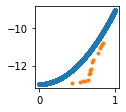

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7030 - disc_loss: 0.6885
Epoch 1002/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7063 - disc_loss: 0.6849
Epoch 1003/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7091 - disc_loss: 0.6818
Epoch 1004/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7113 - disc_loss: 0.6793
Epoch 1005/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7125 - disc_loss: 0.6776
Epoch 1006/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7121 - disc_loss: 0.6775
Epoch 1007/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7099 - disc_loss: 0.6794
Epoch 1008/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7060 - disc_loss: 0.6825
Epoch 1009/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7003 - disc_loss: 0.6876
Epoch 1010/20000
32/32 [============

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7100 - disc_loss: 0.6731
Epoch 1077/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7071 - disc_loss: 0.6786
Epoch 1078/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6933 - disc_loss: 0.6915
Epoch 1079/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6862 - disc_loss: 0.6988
Epoch 1080/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6935 - disc_loss: 0.6938
Epoch 1081/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7010 - disc_loss: 0.6867
Epoch 1082/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7006 - disc_loss: 0.6852
Epoch 1083/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7489 - disc_loss: 0.7068
Epoch 1084/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6971 - disc_loss: 0.7096
Epoch 1085/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6924 - disc_loss: 0.6932
Epoch 1152/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6935 - disc_loss: 0.6942
Epoch 1153/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6944 - disc_loss: 0.6941
Epoch 1154/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6946 - disc_loss: 0.6944
Epoch 1155/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6943 - disc_loss: 0.6943
Epoch 1156/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6942 - disc_loss: 0.6939
Epoch 1157/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6952 - disc_loss: 0.6937
Epoch 1158/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6956 - disc_loss: 0.6932
Epoch 1159/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6956 - disc_loss: 0.6928
Epoch 1160/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6968 - disc_loss: 0.6878
Epoch 1227/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6948 - disc_loss: 0.6906
Epoch 1228/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6923 - disc_loss: 0.6959
Epoch 1229/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6891 - disc_loss: 0.7009
Epoch 1230/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6891 - disc_loss: 0.7023
Epoch 1231/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6945 - disc_loss: 0.6985
Epoch 1232/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7019 - disc_loss: 0.6915
Epoch 1233/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7086 - disc_loss: 0.6850
Epoch 1234/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7087 - disc_loss: 0.6822
Epoch 1235/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6945 - disc_loss: 0.6932
Epoch 1302/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6957 - disc_loss: 0.6937
Epoch 1303/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6970 - disc_loss: 0.6937
Epoch 1304/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7005 - disc_loss: 0.6935
Epoch 1305/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6990 - disc_loss: 0.6934
Epoch 1306/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7004 - disc_loss: 0.6935
Epoch 1307/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7015 - disc_loss: 0.6924
Epoch 1308/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7028 - disc_loss: 0.6909
Epoch 1309/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7040 - disc_loss: 0.6901
Epoch 1310/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6954 - disc_loss: 0.6932
Epoch 1377/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6917 - disc_loss: 0.6957
Epoch 1378/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6882 - disc_loss: 0.6976
Epoch 1379/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6857 - disc_loss: 0.6986
Epoch 1380/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6847 - disc_loss: 0.6986
Epoch 1381/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6842 - disc_loss: 0.6977
Epoch 1382/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6911 - disc_loss: 0.6940
Epoch 1383/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7060 - disc_loss: 0.6830
Epoch 1384/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6989 - disc_loss: 0.6829
Epoch 1385/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6907 - disc_loss: 0.6890
Epoch 1452/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6930 - disc_loss: 0.6870
Epoch 1453/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6942 - disc_loss: 0.6863
Epoch 1454/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6943 - disc_loss: 0.6874
Epoch 1455/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6933 - disc_loss: 0.6909
Epoch 1456/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6921 - disc_loss: 0.6963
Epoch 1457/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6903 - disc_loss: 0.7012
Epoch 1458/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6898 - disc_loss: 0.7033
Epoch 1459/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6924 - disc_loss: 0.7021
Epoch 1460/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6942 - disc_loss: 0.6934
Epoch 1527/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6861 - disc_loss: 0.7003
Epoch 1528/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6901 - disc_loss: 0.6981
Epoch 1529/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6924 - disc_loss: 0.6963
Epoch 1530/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6940 - disc_loss: 0.6953
Epoch 1531/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6953 - disc_loss: 0.6937
Epoch 1532/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6972 - disc_loss: 0.6920
Epoch 1533/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6985 - disc_loss: 0.6903
Epoch 1534/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6993 - disc_loss: 0.6892
Epoch 1535/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6910 - disc_loss: 0.6952
Epoch 1602/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6891 - disc_loss: 0.6961
Epoch 1603/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6889 - disc_loss: 0.6962
Epoch 1604/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6894 - disc_loss: 0.6954
Epoch 1605/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6907 - disc_loss: 0.6941
Epoch 1606/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6923 - disc_loss: 0.6925
Epoch 1607/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6939 - disc_loss: 0.6911
Epoch 1608/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6949 - disc_loss: 0.6900
Epoch 1609/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6955 - disc_loss: 0.6897
Epoch 1610/20000
32/32 [============

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6864 - disc_loss: 0.6978
Epoch 1677/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6868 - disc_loss: 0.6972
Epoch 1678/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6880 - disc_loss: 0.6954
Epoch 1679/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6910 - disc_loss: 0.6923
Epoch 1680/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6943 - disc_loss: 0.6889
Epoch 1681/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6974 - disc_loss: 0.6863
Epoch 1682/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6985 - disc_loss: 0.6865
Epoch 1683/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6956 - disc_loss: 0.6904
Epoch 1684/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6910 - disc_loss: 0.6980
Epoch 1685/20000
32/32 [============

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6933 - disc_loss: 0.6943
Epoch 1752/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6937 - disc_loss: 0.6938
Epoch 1753/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6940 - disc_loss: 0.6934
Epoch 1754/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6943 - disc_loss: 0.6930
Epoch 1755/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6946 - disc_loss: 0.6926
Epoch 1756/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6950 - disc_loss: 0.6922
Epoch 1757/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6954 - disc_loss: 0.6919
Epoch 1758/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6955 - disc_loss: 0.6917
Epoch 1759/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6953 - disc_loss: 0.6917
Epoch 1760/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6773 - disc_loss: 0.7187
Epoch 1827/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6864 - disc_loss: 0.7031
Epoch 1828/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7156 - disc_loss: 0.6692
Epoch 1829/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7518 - disc_loss: 0.6405
Epoch 1830/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7502 - disc_loss: 0.6405
Epoch 1831/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7372 - disc_loss: 0.6523
Epoch 1832/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7064 - disc_loss: 0.6811
Epoch 1833/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6682 - disc_loss: 0.7164
Epoch 1834/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6723 - disc_loss: 0.7128
Epoch 1835/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7033 - disc_loss: 0.6889
Epoch 1902/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6956 - disc_loss: 0.6932
Epoch 1903/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6925 - disc_loss: 0.6971
Epoch 1904/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6889 - disc_loss: 0.6998
Epoch 1905/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6865 - disc_loss: 0.7003
Epoch 1906/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6864 - disc_loss: 0.7003
Epoch 1907/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6872 - disc_loss: 0.6984
Epoch 1908/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6893 - disc_loss: 0.6964
Epoch 1909/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6921 - disc_loss: 0.6934
Epoch 1910/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6962 - disc_loss: 0.6895
Epoch 1977/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6982 - disc_loss: 0.6887
Epoch 1978/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6972 - disc_loss: 0.6882
Epoch 1979/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6976 - disc_loss: 0.6895
Epoch 1980/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6946 - disc_loss: 0.6915
Epoch 1981/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6918 - disc_loss: 0.6935
Epoch 1982/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6903 - disc_loss: 0.6959
Epoch 1983/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6884 - disc_loss: 0.6979
Epoch 1984/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6885 - disc_loss: 0.6987
Epoch 1985/20000
32/32 [============

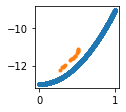

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6957 - disc_loss: 0.6920
Epoch 2002/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6966 - disc_loss: 0.6910
Epoch 2003/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6969 - disc_loss: 0.6905
Epoch 2004/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6968 - disc_loss: 0.6906
Epoch 2005/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6957 - disc_loss: 0.6914
Epoch 2006/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6933 - disc_loss: 0.6931
Epoch 2007/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6914 - disc_loss: 0.6954
Epoch 2008/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6886 - disc_loss: 0.6967
Epoch 2009/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6886 - disc_loss: 0.6972
Epoch 2010/20000
32/32 [============

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6909 - disc_loss: 0.6939
Epoch 2077/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6915 - disc_loss: 0.6931
Epoch 2078/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6922 - disc_loss: 0.6924
Epoch 2079/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6930 - disc_loss: 0.6919
Epoch 2080/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6934 - disc_loss: 0.6918
Epoch 2081/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6935 - disc_loss: 0.6920
Epoch 2082/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6935 - disc_loss: 0.6925
Epoch 2083/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6932 - disc_loss: 0.6930
Epoch 2084/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6933 - disc_loss: 0.6935
Epoch 2085/20000
32/32 [============

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6906 - disc_loss: 0.6961
Epoch 2152/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6948 - disc_loss: 0.6910
Epoch 2153/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6954 - disc_loss: 0.6895
Epoch 2154/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6933 - disc_loss: 0.6927
Epoch 2155/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6909 - disc_loss: 0.6959
Epoch 2156/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6930 - disc_loss: 0.6933
Epoch 2157/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6936 - disc_loss: 0.6930
Epoch 2158/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6930 - disc_loss: 0.6937
Epoch 2159/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6924 - disc_loss: 0.6945
Epoch 2160/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.5427 - disc_loss: 0.6578
Epoch 2227/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.5989 - disc_loss: 0.6368
Epoch 2228/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6435 - disc_loss: 0.6223
Epoch 2229/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6788 - disc_loss: 0.6108
Epoch 2230/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7025 - disc_loss: 0.6037
Epoch 2231/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7221 - disc_loss: 0.6012
Epoch 2232/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7384 - disc_loss: 0.5979
Epoch 2233/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7507 - disc_loss: 0.5974
Epoch 2234/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7612 - disc_loss: 0.5905
Epoch 2235/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6999 - disc_loss: 0.6843
Epoch 2302/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7107 - disc_loss: 0.6848
Epoch 2303/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7123 - disc_loss: 0.6863
Epoch 2304/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6999 - disc_loss: 0.6853
Epoch 2305/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7087 - disc_loss: 0.6877
Epoch 2306/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6998 - disc_loss: 0.6880
Epoch 2307/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7116 - disc_loss: 0.6870
Epoch 2308/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6943 - disc_loss: 0.6871
Epoch 2309/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7050 - disc_loss: 0.6888
Epoch 2310/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6946 - disc_loss: 0.6915
Epoch 2377/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7015 - disc_loss: 0.6916
Epoch 2378/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6935 - disc_loss: 0.6916
Epoch 2379/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6986 - disc_loss: 0.6921
Epoch 2380/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6971 - disc_loss: 0.6916
Epoch 2381/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6974 - disc_loss: 0.6915
Epoch 2382/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6923 - disc_loss: 0.6921
Epoch 2383/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6971 - disc_loss: 0.6918
Epoch 2384/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6937 - disc_loss: 0.6923
Epoch 2385/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7194 - disc_loss: 0.6926
Epoch 2452/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6557 - disc_loss: 0.6923
Epoch 2453/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6965 - disc_loss: 0.6921
Epoch 2454/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7161 - disc_loss: 0.6932
Epoch 2455/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7056 - disc_loss: 0.6927
Epoch 2456/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6833 - disc_loss: 0.6918
Epoch 2457/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7069 - disc_loss: 0.6939
Epoch 2458/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7109 - disc_loss: 0.6927
Epoch 2459/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6805 - disc_loss: 0.6916
Epoch 2460/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6607 - disc_loss: 0.6942
Epoch 2527/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7273 - disc_loss: 0.6929
Epoch 2528/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6862 - disc_loss: 0.6939
Epoch 2529/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6691 - disc_loss: 0.6933
Epoch 2530/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6830 - disc_loss: 0.6917
Epoch 2531/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6638 - disc_loss: 0.6918
Epoch 2532/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7105 - disc_loss: 0.6910
Epoch 2533/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7006 - disc_loss: 0.6918
Epoch 2534/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6888 - disc_loss: 0.6921
Epoch 2535/20000
32/32 [============

32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6888 - disc_loss: 0.6936
Epoch 2602/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6884 - disc_loss: 0.6930
Epoch 2603/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7131 - disc_loss: 0.6931
Epoch 2604/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6579 - disc_loss: 0.6927
Epoch 2605/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7405 - disc_loss: 0.6934
Epoch 2606/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6693 - disc_loss: 0.6932
Epoch 2607/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7251 - disc_loss: 0.6930
Epoch 2608/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6620 - disc_loss: 0.6931
Epoch 2609/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7126 - disc_loss: 0.6927
Epoch 2610/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6949 - disc_loss: 0.6929
Epoch 2677/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7147 - disc_loss: 0.6933
Epoch 2678/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6620 - disc_loss: 0.6942
Epoch 2679/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7151 - disc_loss: 0.6931
Epoch 2680/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6863 - disc_loss: 0.6932
Epoch 2681/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7021 - disc_loss: 0.6932
Epoch 2682/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6856 - disc_loss: 0.6931
Epoch 2683/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7046 - disc_loss: 0.6931
Epoch 2684/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6998 - disc_loss: 0.6933
Epoch 2685/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6890 - disc_loss: 0.6929
Epoch 2752/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6946 - disc_loss: 0.6931
Epoch 2753/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6886 - disc_loss: 0.6931
Epoch 2754/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7038 - disc_loss: 0.6932
Epoch 2755/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6738 - disc_loss: 0.6930
Epoch 2756/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6898 - disc_loss: 0.6932
Epoch 2757/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6948 - disc_loss: 0.6933
Epoch 2758/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7178 - disc_loss: 0.6931
Epoch 2759/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6819 - disc_loss: 0.6934
Epoch 2760/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6898 - disc_loss: 0.6929
Epoch 2827/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6989 - disc_loss: 0.6929
Epoch 2828/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6907 - disc_loss: 0.6927
Epoch 2829/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6968 - disc_loss: 0.6928
Epoch 2830/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6875 - disc_loss: 0.6929
Epoch 2831/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6964 - disc_loss: 0.6928
Epoch 2832/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6912 - disc_loss: 0.6929
Epoch 2833/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6900 - disc_loss: 0.6936
Epoch 2834/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7026 - disc_loss: 0.6920
Epoch 2835/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7389 - disc_loss: 0.6931
Epoch 2902/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6791 - disc_loss: 0.6929
Epoch 2903/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7119 - disc_loss: 0.6932
Epoch 2904/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6856 - disc_loss: 0.6931
Epoch 2905/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7265 - disc_loss: 0.6931
Epoch 2906/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6821 - disc_loss: 0.6934
Epoch 2907/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7026 - disc_loss: 0.6937
Epoch 2908/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6493 - disc_loss: 0.6923
Epoch 2909/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7298 - disc_loss: 0.6923
Epoch 2910/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6452 - disc_loss: 0.6924
Epoch 2977/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7363 - disc_loss: 0.6932
Epoch 2978/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6651 - disc_loss: 0.6928
Epoch 2979/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7213 - disc_loss: 0.6930
Epoch 2980/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6803 - disc_loss: 0.6934
Epoch 2981/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6889 - disc_loss: 0.6933
Epoch 2982/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7236 - disc_loss: 0.6925
Epoch 2983/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6755 - disc_loss: 0.6936
Epoch 2984/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6912 - disc_loss: 0.6920
Epoch 2985/20000
32/32 [============

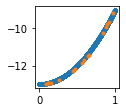

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7131 - disc_loss: 0.6929
Epoch 3002/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6679 - disc_loss: 0.6929
Epoch 3003/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7223 - disc_loss: 0.6934
Epoch 3004/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6817 - disc_loss: 0.6927
Epoch 3005/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6932 - disc_loss: 0.6927
Epoch 3006/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7045 - disc_loss: 0.6941
Epoch 3007/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7231 - disc_loss: 0.6938
Epoch 3008/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6304 - disc_loss: 0.6926
Epoch 3009/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7333 - disc_loss: 0.6933
Epoch 3010/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7453 - disc_loss: 0.6934
Epoch 3077/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6709 - disc_loss: 0.6921
Epoch 3078/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7010 - disc_loss: 0.6932
Epoch 3079/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7065 - disc_loss: 0.6932
Epoch 3080/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6743 - disc_loss: 0.6932
Epoch 3081/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7092 - disc_loss: 0.6937
Epoch 3082/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7167 - disc_loss: 0.6930
Epoch 3083/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6406 - disc_loss: 0.6931
Epoch 3084/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7568 - disc_loss: 0.6925
Epoch 3085/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6826 - disc_loss: 0.6936
Epoch 3152/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7405 - disc_loss: 0.6932
Epoch 3153/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6668 - disc_loss: 0.6922
Epoch 3154/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6843 - disc_loss: 0.6931
Epoch 3155/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7293 - disc_loss: 0.6935
Epoch 3156/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6510 - disc_loss: 0.6921
Epoch 3157/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7165 - disc_loss: 0.6928
Epoch 3158/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7221 - disc_loss: 0.6936
Epoch 3159/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6624 - disc_loss: 0.6921
Epoch 3160/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7087 - disc_loss: 0.6923
Epoch 3227/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6731 - disc_loss: 0.6923
Epoch 3228/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6750 - disc_loss: 0.6939
Epoch 3229/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7552 - disc_loss: 0.6924
Epoch 3230/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6791 - disc_loss: 0.6924
Epoch 3231/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6718 - disc_loss: 0.6937
Epoch 3232/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7308 - disc_loss: 0.6928
Epoch 3233/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7009 - disc_loss: 0.6938
Epoch 3234/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6633 - disc_loss: 0.6920
Epoch 3235/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6808 - disc_loss: 0.6923
Epoch 3302/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6853 - disc_loss: 0.6928
Epoch 3303/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6902 - disc_loss: 0.6931
Epoch 3304/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6942 - disc_loss: 0.6935
Epoch 3305/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6947 - disc_loss: 0.6935
Epoch 3306/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7162 - disc_loss: 0.6932
Epoch 3307/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6393 - disc_loss: 0.6914
Epoch 3308/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7484 - disc_loss: 0.6922
Epoch 3309/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7033 - disc_loss: 0.6931
Epoch 3310/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6932 - disc_loss: 0.6943
Epoch 3377/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7579 - disc_loss: 0.6919
Epoch 3378/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6580 - disc_loss: 0.6915
Epoch 3379/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6431 - disc_loss: 0.6913
Epoch 3380/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7413 - disc_loss: 0.6924
Epoch 3381/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7176 - disc_loss: 0.6922
Epoch 3382/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6868 - disc_loss: 0.6923
Epoch 3383/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7177 - disc_loss: 0.6919
Epoch 3384/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6777 - disc_loss: 0.6932
Epoch 3385/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6986 - disc_loss: 0.6932
Epoch 3452/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6957 - disc_loss: 0.6934
Epoch 3453/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6887 - disc_loss: 0.6933
Epoch 3454/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6826 - disc_loss: 0.6934
Epoch 3455/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6970 - disc_loss: 0.6932
Epoch 3456/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6960 - disc_loss: 0.6931
Epoch 3457/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6893 - disc_loss: 0.6935
Epoch 3458/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6876 - disc_loss: 0.6935
Epoch 3459/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6955 - disc_loss: 0.6934
Epoch 3460/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6905 - disc_loss: 0.6922
Epoch 3527/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6879 - disc_loss: 0.6924
Epoch 3528/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6862 - disc_loss: 0.6929
Epoch 3529/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6892 - disc_loss: 0.6938
Epoch 3530/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7012 - disc_loss: 0.6930
Epoch 3531/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7400 - disc_loss: 0.6925
Epoch 3532/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6488 - disc_loss: 0.6947
Epoch 3533/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7160 - disc_loss: 0.6892
Epoch 3534/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7418 - disc_loss: 0.6901
Epoch 3535/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6947 - disc_loss: 0.6929
Epoch 3602/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6895 - disc_loss: 0.6929
Epoch 3603/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6915 - disc_loss: 0.6930
Epoch 3604/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7071 - disc_loss: 0.6932
Epoch 3605/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6840 - disc_loss: 0.6928
Epoch 3606/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6854 - disc_loss: 0.6930
Epoch 3607/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6988 - disc_loss: 0.6933
Epoch 3608/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7142 - disc_loss: 0.6932
Epoch 3609/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6601 - disc_loss: 0.6914
Epoch 3610/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6863 - disc_loss: 0.6923
Epoch 3677/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6973 - disc_loss: 0.6936
Epoch 3678/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7039 - disc_loss: 0.6936
Epoch 3679/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7138 - disc_loss: 0.6921
Epoch 3680/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7101 - disc_loss: 0.6924
Epoch 3681/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6926 - disc_loss: 0.6940
Epoch 3682/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6763 - disc_loss: 0.6935
Epoch 3683/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6744 - disc_loss: 0.6927
Epoch 3684/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6796 - disc_loss: 0.6930
Epoch 3685/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6847 - disc_loss: 0.6931
Epoch 3752/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6938 - disc_loss: 0.6932
Epoch 3753/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6953 - disc_loss: 0.6931
Epoch 3754/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6903 - disc_loss: 0.6939
Epoch 3755/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6845 - disc_loss: 0.6943
Epoch 3756/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6845 - disc_loss: 0.6932
Epoch 3757/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6866 - disc_loss: 0.6930
Epoch 3758/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7067 - disc_loss: 0.6924
Epoch 3759/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7040 - disc_loss: 0.6916
Epoch 3760/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7048 - disc_loss: 0.6935
Epoch 3827/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7068 - disc_loss: 0.6931
Epoch 3828/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7060 - disc_loss: 0.6934
Epoch 3829/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7037 - disc_loss: 0.6939
Epoch 3830/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6994 - disc_loss: 0.6950
Epoch 3831/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6992 - disc_loss: 0.6945
Epoch 3832/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6997 - disc_loss: 0.6941
Epoch 3833/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7015 - disc_loss: 0.6929
Epoch 3834/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7020 - disc_loss: 0.6919
Epoch 3835/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6608 - disc_loss: 0.6961
Epoch 3902/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6797 - disc_loss: 0.6940
Epoch 3903/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.6855 - disc_loss: 0.6922
Epoch 3904/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6872 - disc_loss: 0.6909
Epoch 3905/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6859 - disc_loss: 0.6901
Epoch 3906/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6807 - disc_loss: 0.6905
Epoch 3907/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6759 - disc_loss: 0.6926
Epoch 3908/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6821 - disc_loss: 0.6964
Epoch 3909/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6974 - disc_loss: 0.6982
Epoch 3910/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6915 - disc_loss: 0.6936
Epoch 3977/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6948 - disc_loss: 0.6944
Epoch 3978/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6968 - disc_loss: 0.6945
Epoch 3979/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6982 - disc_loss: 0.6937
Epoch 3980/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7002 - disc_loss: 0.6925
Epoch 3981/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7042 - disc_loss: 0.6912
Epoch 3982/20000
32/32 [==============================] - 0s 2ms/step - gen_loss: 0.7093 - disc_loss: 0.6927
Epoch 3983/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6814 - disc_loss: 0.6952
Epoch 3984/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6834 - disc_loss: 0.6951
Epoch 3985/20000
32/32 [============

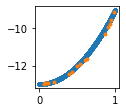

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6816 - disc_loss: 0.6932
Epoch 4002/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6872 - disc_loss: 0.6944
Epoch 4003/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6957 - disc_loss: 0.6941
Epoch 4004/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6844 - disc_loss: 0.6916
Epoch 4005/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6857 - disc_loss: 0.6919
Epoch 4006/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7184 - disc_loss: 0.6912
Epoch 4007/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6941 - disc_loss: 0.6976
Epoch 4008/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6846 - disc_loss: 0.6962
Epoch 4009/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6907 - disc_loss: 0.6859
Epoch 4010/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6816 - disc_loss: 0.6974
Epoch 4077/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6889 - disc_loss: 0.6951
Epoch 4078/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6963 - disc_loss: 0.6933
Epoch 4079/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6971 - disc_loss: 0.6915
Epoch 4080/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6986 - disc_loss: 0.6902
Epoch 4081/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6997 - disc_loss: 0.6891
Epoch 4082/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6992 - disc_loss: 0.6888
Epoch 4083/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6989 - disc_loss: 0.6899
Epoch 4084/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6982 - disc_loss: 0.6926
Epoch 4085/20000
32/32 [============

32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6911 - disc_loss: 0.6923
Epoch 4152/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6914 - disc_loss: 0.6927
Epoch 4153/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6900 - disc_loss: 0.6930
Epoch 4154/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6923 - disc_loss: 0.6935
Epoch 4155/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6933 - disc_loss: 0.6936
Epoch 4156/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6936 - disc_loss: 0.6940
Epoch 4157/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6969 - disc_loss: 0.6938
Epoch 4158/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6967 - disc_loss: 0.6936
Epoch 4159/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6965 - disc_loss: 0.6931
Epoch 4160/20000
32/32 [============

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6803 - disc_loss: 0.6949
Epoch 4227/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6909 - disc_loss: 0.6914
Epoch 4228/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6900
Epoch 4229/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6965 - disc_loss: 0.6897
Epoch 4230/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.7112 - disc_loss: 0.6894
Epoch 4231/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6749 - disc_loss: 0.7016
Epoch 4232/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6837 - disc_loss: 0.7035
Epoch 4233/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6989 - disc_loss: 0.7017
Epoch 4234/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7028 - disc_loss: 0.6979
Epoch 4235/20000
32/32 [============

32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7163 - disc_loss: 0.6915
Epoch 4301/20000
32/32 [==============================] - 1s 14ms/step - gen_loss: 0.6705 - disc_loss: 0.6986
Epoch 4302/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6767 - disc_loss: 0.6902
Epoch 4303/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6816 - disc_loss: 0.6926
Epoch 4304/20000
32/32 [==============================] - 1s 16ms/step - gen_loss: 0.6750 - disc_loss: 0.6967
Epoch 4305/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7055 - disc_loss: 0.6904
Epoch 4306/20000
32/32 [==============================] - 1s 18ms/step - gen_loss: 0.7067 - disc_loss: 0.6909
Epoch 4307/20000
32/32 [==============================] - 1s 19ms/step - gen_loss: 0.6799 - disc_loss: 0.6956
Epoch 4308/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6709 - disc_loss: 0.6923
Epoch 4309/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6850 - disc_loss: 0.6969
Epoch 4375/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6865 - disc_loss: 0.6942
Epoch 4376/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6943 - disc_loss: 0.6919
Epoch 4377/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6935 - disc_loss: 0.6906
Epoch 4378/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6916 - disc_loss: 0.6909
Epoch 4379/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6954 - disc_loss: 0.6939
Epoch 4380/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7003 - disc_loss: 0.6958
Epoch 4381/20000
32/32 [==============================] - 1s 16ms/step - gen_loss: 0.6941 - disc_loss: 0.6950
Epoch 4382/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6842 - disc_loss: 0.6944
Epoch 4383/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6740 - disc_loss: 0.6996
Epoch 4449/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6829 - disc_loss: 0.6989
Epoch 4450/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6880 - disc_loss: 0.6985
Epoch 4451/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6914 - disc_loss: 0.6977
Epoch 4452/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6939 - disc_loss: 0.6968
Epoch 4453/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6957 - disc_loss: 0.6955
Epoch 4454/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6978 - disc_loss: 0.6940
Epoch 4455/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7003 - disc_loss: 0.6921
Epoch 4456/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.7018 - disc_loss: 0.6900
Epoch 4457/20000
32/32 [============

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6856 - disc_loss: 0.6965
Epoch 4524/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6908 - disc_loss: 0.6929
Epoch 4525/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6982 - disc_loss: 0.6886
Epoch 4526/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7096 - disc_loss: 0.6838
Epoch 4527/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7063 - disc_loss: 0.6841
Epoch 4528/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6890 - disc_loss: 0.6899
Epoch 4529/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6829 - disc_loss: 0.6978
Epoch 4530/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6784 - disc_loss: 0.7009
Epoch 4531/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6845 - disc_loss: 0.6983
Epoch 4532/20000
32/32 [========

Epoch 4598/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6926 - disc_loss: 0.6930
Epoch 4599/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6930 - disc_loss: 0.6933
Epoch 4600/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6932 - disc_loss: 0.6934
Epoch 4601/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6921 - disc_loss: 0.6936
Epoch 4602/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6922 - disc_loss: 0.6937
Epoch 4603/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6931 - disc_loss: 0.6937
Epoch 4604/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6925 - disc_loss: 0.6935
Epoch 4605/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6927 - disc_loss: 0.6934
Epoch 4606/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6932 - disc_loss: 0.6933
Epoch 4607/200

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6891 - disc_loss: 0.6952
Epoch 4673/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6879 - disc_loss: 0.6971
Epoch 4674/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6893 - disc_loss: 0.6969
Epoch 4675/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6884 - disc_loss: 0.6951
Epoch 4676/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6909 - disc_loss: 0.6935
Epoch 4677/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6923 - disc_loss: 0.6919
Epoch 4678/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6943 - disc_loss: 0.6910
Epoch 4679/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6950 - disc_loss: 0.6910
Epoch 4680/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6958 - disc_loss: 0.6917
Epoch 4681/20000
32/32 [===========

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6997 - disc_loss: 0.6920
Epoch 4748/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6989 - disc_loss: 0.6920
Epoch 4749/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6973 - disc_loss: 0.6922
Epoch 4750/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6950 - disc_loss: 0.6928
Epoch 4751/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6919 - disc_loss: 0.6936
Epoch 4752/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6894 - disc_loss: 0.6943
Epoch 4753/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6871 - disc_loss: 0.6948
Epoch 4754/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6855 - disc_loss: 0.6949
Epoch 4755/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6848 - disc_loss: 0.6943
Epoch 4756/20000
32/32 [=========

Epoch 4822/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6816 - disc_loss: 0.6970
Epoch 4823/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7264 - disc_loss: 0.6798
Epoch 4824/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.8586 - disc_loss: 0.6554
Epoch 4825/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6808 - disc_loss: 0.7006
Epoch 4826/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.5894 - disc_loss: 0.7048
Epoch 4827/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6121 - disc_loss: 0.6735
Epoch 4828/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6688 - disc_loss: 0.6831
Epoch 4829/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7123 - disc_loss: 0.6949
Epoch 4830/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7265 - disc_loss: 0.6946
Epoch 4831/

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7027 - disc_loss: 0.6913
Epoch 4897/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7013 - disc_loss: 0.6916
Epoch 4898/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6986 - disc_loss: 0.6925
Epoch 4899/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6965 - disc_loss: 0.6934
Epoch 4900/20000
32/32 [==============================] - 0s 15ms/step - gen_loss: 0.6940 - disc_loss: 0.6938
Epoch 4901/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6925 - disc_loss: 0.6941
Epoch 4902/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6913 - disc_loss: 0.6941
Epoch 4903/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6898 - disc_loss: 0.6937
Epoch 4904/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6894 - disc_loss: 0.6933
Epoch 4905/20000
32/32 [========

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7246 - disc_loss: 0.6907
Epoch 4972/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7344 - disc_loss: 0.6913
Epoch 4973/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6839 - disc_loss: 0.7002
Epoch 4974/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6656 - disc_loss: 0.6964
Epoch 4975/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6973 - disc_loss: 0.6861
Epoch 4976/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7095 - disc_loss: 0.6869
Epoch 4977/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6961 - disc_loss: 0.6937
Epoch 4978/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6873 - disc_loss: 0.7016
Epoch 4979/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6813 - disc_loss: 0.7060
Epoch 4980/20000
32/32 [===========

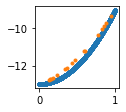

32/32 [==============================] - 1s 31ms/step - gen_loss: 0.7220 - disc_loss: 0.6875
Epoch 5002/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7010 - disc_loss: 0.6887
Epoch 5003/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6954 - disc_loss: 0.6915
Epoch 5004/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6748 - disc_loss: 0.6959
Epoch 5005/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6669 - disc_loss: 0.6970
Epoch 5006/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6684 - disc_loss: 0.6951
Epoch 5007/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6878 - disc_loss: 0.6909
Epoch 5008/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7013 - disc_loss: 0.6886
Epoch 5009/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7030 - disc_loss: 0.6928
Epoch 5010/20000
32/32 [==========

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6974 - disc_loss: 0.6885
Epoch 5077/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6971 - disc_loss: 0.6884
Epoch 5078/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6963 - disc_loss: 0.6889
Epoch 5079/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6952 - disc_loss: 0.6904
Epoch 5080/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6930 - disc_loss: 0.6928
Epoch 5081/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6907 - disc_loss: 0.6953
Epoch 5082/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6892 - disc_loss: 0.6979
Epoch 5083/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6886 - disc_loss: 0.6994
Epoch 5084/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6887 - disc_loss: 0.6994
Epoch 5085/20000
32/32 [=========

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6929 - disc_loss: 0.6931
Epoch 5152/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6931 - disc_loss: 0.6930
Epoch 5153/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6931 - disc_loss: 0.6929
Epoch 5154/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6931 - disc_loss: 0.6928
Epoch 5155/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6930 - disc_loss: 0.6929
Epoch 5156/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6929 - disc_loss: 0.6929
Epoch 5157/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6930 - disc_loss: 0.6930
Epoch 5158/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6927 - disc_loss: 0.6931
Epoch 5159/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6925 - disc_loss: 0.6932
Epoch 5160/20000
32/32 [========

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6918 - disc_loss: 0.6949
Epoch 5227/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6860 - disc_loss: 0.7006
Epoch 5228/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6859 - disc_loss: 0.7005
Epoch 5229/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6888 - disc_loss: 0.6971
Epoch 5230/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6930 - disc_loss: 0.6928
Epoch 5231/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6968 - disc_loss: 0.6892
Epoch 5232/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6989 - disc_loss: 0.6870
Epoch 5233/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6993 - disc_loss: 0.6864
Epoch 5234/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6987 - disc_loss: 0.6873
Epoch 5235/20000
32/32 [=========

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6999 - disc_loss: 0.6939
Epoch 5302/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7012 - disc_loss: 0.6926
Epoch 5303/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7017 - disc_loss: 0.6913
Epoch 5304/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.7011 - disc_loss: 0.6904
Epoch 5305/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7008 - disc_loss: 0.6897
Epoch 5306/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6992 - disc_loss: 0.6894
Epoch 5307/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6985 - disc_loss: 0.6900
Epoch 5308/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6968 - disc_loss: 0.6905
Epoch 5309/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6945 - disc_loss: 0.6916
Epoch 5310/20000
32/32 [============

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6995 - disc_loss: 0.6886
Epoch 5377/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6965 - disc_loss: 0.6885
Epoch 5378/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6971 - disc_loss: 0.6885
Epoch 5379/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6962 - disc_loss: 0.6895
Epoch 5380/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6953 - disc_loss: 0.6904
Epoch 5381/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6942 - disc_loss: 0.6920
Epoch 5382/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6930 - disc_loss: 0.6936
Epoch 5383/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6903 - disc_loss: 0.6956
Epoch 5384/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6900 - disc_loss: 0.6974
Epoch 5385/20000
32/32 [============

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6889 - disc_loss: 0.6931
Epoch 5452/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6891 - disc_loss: 0.6924
Epoch 5453/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6897 - disc_loss: 0.6914
Epoch 5454/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6897 - disc_loss: 0.6903
Epoch 5455/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6906 - disc_loss: 0.6892
Epoch 5456/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6929 - disc_loss: 0.6888
Epoch 5457/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6949 - disc_loss: 0.6882
Epoch 5458/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6957 - disc_loss: 0.6886
Epoch 5459/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6961 - disc_loss: 0.6905
Epoch 5460/20000
32/32 [===========

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6880 - disc_loss: 0.6960
Epoch 5527/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6880 - disc_loss: 0.6957
Epoch 5528/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6881 - disc_loss: 0.6954
Epoch 5529/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6877 - disc_loss: 0.6950
Epoch 5530/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6873 - disc_loss: 0.6944
Epoch 5531/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6889 - disc_loss: 0.6936
Epoch 5532/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6892 - disc_loss: 0.6929
Epoch 5533/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6898 - disc_loss: 0.6920
Epoch 5534/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6904 - disc_loss: 0.6910
Epoch 5535/20000
32/32 [============

32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6713 - disc_loss: 0.6977
Epoch 5602/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6726 - disc_loss: 0.6941
Epoch 5603/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6756 - disc_loss: 0.6906
Epoch 5604/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6786 - disc_loss: 0.6871
Epoch 5605/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6839 - disc_loss: 0.6833
Epoch 5606/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6867 - disc_loss: 0.6814
Epoch 5607/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6908 - disc_loss: 0.6817
Epoch 5608/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6903 - disc_loss: 0.6821
Epoch 5609/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6892 - disc_loss: 0.6824
Epoch 5610/20000
32/32 [============

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7014 - disc_loss: 0.6982
Epoch 5677/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7022 - disc_loss: 0.6966
Epoch 5678/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7085 - disc_loss: 0.6927
Epoch 5679/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7078 - disc_loss: 0.6892
Epoch 5680/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7027 - disc_loss: 0.6884
Epoch 5681/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6986 - disc_loss: 0.6899
Epoch 5682/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6932 - disc_loss: 0.6925
Epoch 5683/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6912 - disc_loss: 0.6959
Epoch 5684/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6906 - disc_loss: 0.6984
Epoch 5685/20000
32/32 [===========

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6908 - disc_loss: 0.6928
Epoch 5752/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6898 - disc_loss: 0.6927
Epoch 5753/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6925 - disc_loss: 0.6927
Epoch 5754/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6918 - disc_loss: 0.6925
Epoch 5755/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6898 - disc_loss: 0.6924
Epoch 5756/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6895 - disc_loss: 0.6923
Epoch 5757/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6902 - disc_loss: 0.6921
Epoch 5758/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6928 - disc_loss: 0.6921
Epoch 5759/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6940 - disc_loss: 0.6918
Epoch 5760/20000
32/32 [========

Epoch 5826/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6940 - disc_loss: 0.6940
Epoch 5827/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6952 - disc_loss: 0.6947
Epoch 5828/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6950 - disc_loss: 0.6938
Epoch 5829/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6925 - disc_loss: 0.6931
Epoch 5830/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6876 - disc_loss: 0.6938
Epoch 5831/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6866 - disc_loss: 0.6940
Epoch 5832/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6861 - disc_loss: 0.6939
Epoch 5833/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6859 - disc_loss: 0.6937
Epoch 5834/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6896 - disc_loss: 0.6936
Epoch 5835/2

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6907 - disc_loss: 0.6961
Epoch 5902/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6865 - disc_loss: 0.6959
Epoch 5903/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6858 - disc_loss: 0.6926
Epoch 5904/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6887 - disc_loss: 0.6895
Epoch 5905/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6906 - disc_loss: 0.6893
Epoch 5906/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6915 - disc_loss: 0.6912
Epoch 5907/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6920 - disc_loss: 0.6941
Epoch 5908/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6923 - disc_loss: 0.6960
Epoch 5909/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6939 - disc_loss: 0.6962
Epoch 5910/20000
32/32 [============

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6893 - disc_loss: 0.6950
Epoch 5977/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6867 - disc_loss: 0.6957
Epoch 5978/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6845 - disc_loss: 0.6956
Epoch 5979/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6844 - disc_loss: 0.6942
Epoch 5980/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6864 - disc_loss: 0.6928
Epoch 5981/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6875 - disc_loss: 0.6918
Epoch 5982/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6892 - disc_loss: 0.6916
Epoch 5983/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6894 - disc_loss: 0.6922
Epoch 5984/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6902 - disc_loss: 0.6937
Epoch 5985/20000
32/32 [===========

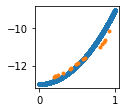

32/32 [==============================] - 1s 23ms/step - gen_loss: 0.6925 - disc_loss: 0.6938
Epoch 6002/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6911 - disc_loss: 0.7045
Epoch 6003/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6933 - disc_loss: 0.7009
Epoch 6004/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6995 - disc_loss: 0.6964
Epoch 6005/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7019 - disc_loss: 0.6936
Epoch 6006/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7032 - disc_loss: 0.6914
Epoch 6007/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7052 - disc_loss: 0.6893
Epoch 6008/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7038 - disc_loss: 0.6880
Epoch 6009/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7038 - disc_loss: 0.6881
Epoch 6010/20000
32/32 [===========

32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6988 - disc_loss: 0.6926
Epoch 6077/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6998 - disc_loss: 0.6921
Epoch 6078/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7006 - disc_loss: 0.6920
Epoch 6079/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6994 - disc_loss: 0.6917
Epoch 6080/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6999 - disc_loss: 0.6921
Epoch 6081/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6959 - disc_loss: 0.6917
Epoch 6082/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6918 - disc_loss: 0.6923
Epoch 6083/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6906 - disc_loss: 0.6926
Epoch 6084/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6888 - disc_loss: 0.6924
Epoch 6085/20000
32/32 [============

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7051 - disc_loss: 0.6856
Epoch 6152/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7022 - disc_loss: 0.6870
Epoch 6153/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6962 - disc_loss: 0.6913
Epoch 6154/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6900 - disc_loss: 0.6953
Epoch 6155/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6856 - disc_loss: 0.6988
Epoch 6156/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6832 - disc_loss: 0.7005
Epoch 6157/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6821 - disc_loss: 0.7004
Epoch 6158/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6836 - disc_loss: 0.6989
Epoch 6159/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6861 - disc_loss: 0.6966
Epoch 6160/20000
32/32 [===========

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6838 - disc_loss: 0.6988
Epoch 6227/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6976 - disc_loss: 0.6898
Epoch 6228/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6971 - disc_loss: 0.6887
Epoch 6229/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6958 - disc_loss: 0.6899
Epoch 6230/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6933 - disc_loss: 0.6922
Epoch 6231/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6914 - disc_loss: 0.6951
Epoch 6232/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6890 - disc_loss: 0.6972
Epoch 6233/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6903 - disc_loss: 0.6970
Epoch 6234/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7068 - disc_loss: 0.6869
Epoch 6235/20000
32/32 [============

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6933 - disc_loss: 0.6927
Epoch 6302/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6952 - disc_loss: 0.6914
Epoch 6303/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6965 - disc_loss: 0.6914
Epoch 6304/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6972 - disc_loss: 0.6931
Epoch 6305/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6961 - disc_loss: 0.6935
Epoch 6306/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6973 - disc_loss: 0.6948
Epoch 6307/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7013 - disc_loss: 0.6956
Epoch 6308/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6926 - disc_loss: 0.6947
Epoch 6309/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6942 - disc_loss: 0.6943
Epoch 6310/20000
32/32 [==========

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6952 - disc_loss: 0.6933
Epoch 6377/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6958 - disc_loss: 0.6933
Epoch 6378/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6956 - disc_loss: 0.6934
Epoch 6379/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6960 - disc_loss: 0.6932
Epoch 6380/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6963 - disc_loss: 0.6928
Epoch 6381/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6954 - disc_loss: 0.6926
Epoch 6382/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6942 - disc_loss: 0.6927
Epoch 6383/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6922 - disc_loss: 0.6933
Epoch 6384/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6900 - disc_loss: 0.6937
Epoch 6385/20000
32/32 [==========

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6904 - disc_loss: 0.6952
Epoch 6452/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6821 - disc_loss: 0.7022
Epoch 6453/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6779 - disc_loss: 0.7065
Epoch 6454/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6760 - disc_loss: 0.7074
Epoch 6455/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6761 - disc_loss: 0.7068
Epoch 6456/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6779 - disc_loss: 0.7035
Epoch 6457/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6967 - disc_loss: 0.6914
Epoch 6458/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7363 - disc_loss: 0.6615
Epoch 6459/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7227 - disc_loss: 0.6635
Epoch 6460/20000
32/32 [============

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6883 - disc_loss: 0.6929
Epoch 6527/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6907 - disc_loss: 0.6907
Epoch 6528/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6933 - disc_loss: 0.6881
Epoch 6529/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6965 - disc_loss: 0.6873
Epoch 6530/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6993 - disc_loss: 0.6872
Epoch 6531/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6982 - disc_loss: 0.6908
Epoch 6532/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6968 - disc_loss: 0.6940
Epoch 6533/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6946 - disc_loss: 0.6958
Epoch 6534/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6933 - disc_loss: 0.6962
Epoch 6535/20000
32/32 [==========

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6908 - disc_loss: 0.6985
Epoch 6602/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6877 - disc_loss: 0.7030
Epoch 6603/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6895 - disc_loss: 0.7039
Epoch 6604/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6952 - disc_loss: 0.7004
Epoch 6605/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7034 - disc_loss: 0.6927
Epoch 6606/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7100 - disc_loss: 0.6847
Epoch 6607/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7112 - disc_loss: 0.6805
Epoch 6608/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7072 - disc_loss: 0.6821
Epoch 6609/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6998 - disc_loss: 0.6882
Epoch 6610/20000
32/32 [========

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7090 - disc_loss: 0.6778
Epoch 6676/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7033 - disc_loss: 0.6818
Epoch 6677/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6966 - disc_loss: 0.6886
Epoch 6678/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6898 - disc_loss: 0.6957
Epoch 6679/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6832 - disc_loss: 0.7019
Epoch 6680/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6765 - disc_loss: 0.7076
Epoch 6681/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6752 - disc_loss: 0.7112
Epoch 6682/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6788 - disc_loss: 0.7077
Epoch 6683/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6893 - disc_loss: 0.6921
Epoch 6684/20000
32/32 [===

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6875 - disc_loss: 0.6959
Epoch 6750/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6905 - disc_loss: 0.6929
Epoch 6751/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6931 - disc_loss: 0.6895
Epoch 6752/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6954 - disc_loss: 0.6873
Epoch 6753/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6967 - disc_loss: 0.6865
Epoch 6754/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6958 - disc_loss: 0.6872
Epoch 6755/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6946 - disc_loss: 0.6896
Epoch 6756/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6921 - disc_loss: 0.6929
Epoch 6757/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6889 - disc_loss: 0.6970
Epoch 6758/20000
32/32 [=========

Epoch 6824/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7078 - disc_loss: 0.6823
Epoch 6825/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7051 - disc_loss: 0.6844
Epoch 6826/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6992 - disc_loss: 0.6889
Epoch 6827/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6924 - disc_loss: 0.6947
Epoch 6828/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6854 - disc_loss: 0.6998
Epoch 6829/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6820 - disc_loss: 0.7035
Epoch 6830/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6793 - disc_loss: 0.7051
Epoch 6831/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6812 - disc_loss: 0.7020
Epoch 6832/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7013 - disc_loss: 0.6913
Epoch 6833/20000

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7059 - disc_loss: 0.6841
Epoch 6899/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7064 - disc_loss: 0.6828
Epoch 6900/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7051 - disc_loss: 0.6836
Epoch 6901/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7011 - disc_loss: 0.6871
Epoch 6902/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6967 - disc_loss: 0.6918
Epoch 6903/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6925 - disc_loss: 0.6968
Epoch 6904/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6868 - disc_loss: 0.7010
Epoch 6905/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6840 - disc_loss: 0.7037
Epoch 6906/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6823 - disc_loss: 0.7051
Epoch 6907/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6940 - disc_loss: 0.6927
Epoch 6973/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6893 - disc_loss: 0.6970
Epoch 6974/20000
32/32 [==============================] - 1s 14ms/step - gen_loss: 0.6856 - disc_loss: 0.6999
Epoch 6975/20000
32/32 [==============================] - 1s 18ms/step - gen_loss: 0.6837 - disc_loss: 0.7016
Epoch 6976/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6838 - disc_loss: 0.7013
Epoch 6977/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6992 - disc_loss: 0.6931
Epoch 6978/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7133 - disc_loss: 0.6748
Epoch 6979/20000
32/32 [==============================] - 1s 17ms/step - gen_loss: 0.7007 - disc_loss: 0.6858
Epoch 6980/20000
32/32 [==============================] - 1s 14ms/step - gen_loss: 0.6806 - disc_loss: 0.7014
Epoch 6981/20000
32/32 [===

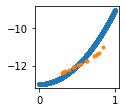

32/32 [==============================] - 1s 28ms/step - gen_loss: 0.6954 - disc_loss: 0.6943
Epoch 7002/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6975 - disc_loss: 0.6922
Epoch 7003/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6987 - disc_loss: 0.6905
Epoch 7004/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6987 - disc_loss: 0.6902
Epoch 7005/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6981 - disc_loss: 0.6915
Epoch 7006/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6958 - disc_loss: 0.6928
Epoch 7007/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6942
Epoch 7008/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6925 - disc_loss: 0.6954
Epoch 7009/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6917 - disc_loss: 0.6958
Epoch 7010/20000
32/32 [========

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6859 - disc_loss: 0.6938
Epoch 7076/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6825 - disc_loss: 0.6952
Epoch 7077/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6838 - disc_loss: 0.6918
Epoch 7078/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6917 - disc_loss: 0.6854
Epoch 7079/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6962 - disc_loss: 0.6812
Epoch 7080/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6980 - disc_loss: 0.6844
Epoch 7081/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6964 - disc_loss: 0.6910
Epoch 7082/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6932 - disc_loss: 0.6972
Epoch 7083/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6911 - disc_loss: 0.7004
Epoch 7084/20000
32/32 [========

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7002 - disc_loss: 0.6873
Epoch 7150/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6948 - disc_loss: 0.6934
Epoch 7151/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6891 - disc_loss: 0.6992
Epoch 7152/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6846 - disc_loss: 0.7035
Epoch 7153/20000
32/32 [==============================] - 1s 15ms/step - gen_loss: 0.6823 - disc_loss: 0.7062
Epoch 7154/20000
32/32 [==============================] - 0s 15ms/step - gen_loss: 0.6819 - disc_loss: 0.7059
Epoch 7155/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6990 - disc_loss: 0.6950
Epoch 7156/20000
32/32 [==============================] - 1s 15ms/step - gen_loss: 0.6960 - disc_loss: 0.6744
Epoch 7157/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7014 - disc_loss: 0.6680
Epoch 7158/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6943 - disc_loss: 0.6937
Epoch 7224/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6978 - disc_loss: 0.6930
Epoch 7225/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6912 - disc_loss: 0.6927
Epoch 7226/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6899 - disc_loss: 0.6931
Epoch 7227/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6905 - disc_loss: 0.6934
Epoch 7228/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6986 - disc_loss: 0.6949
Epoch 7229/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6958 - disc_loss: 0.6915
Epoch 7230/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6897 - disc_loss: 0.6920
Epoch 7231/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6903 - disc_loss: 0.6931
Epoch 7232/20000
32/32 [=======

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6911 - disc_loss: 0.7025
Epoch 7298/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6946 - disc_loss: 0.7037
Epoch 7299/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7007 - disc_loss: 0.7005
Epoch 7300/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7125 - disc_loss: 0.6917
Epoch 7301/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7191 - disc_loss: 0.6823
Epoch 7302/20000
32/32 [==============================] - 0s 15ms/step - gen_loss: 0.7152 - disc_loss: 0.6793
Epoch 7303/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7063 - disc_loss: 0.6824
Epoch 7304/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6977 - disc_loss: 0.6878
Epoch 7305/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6883 - disc_loss: 0.6939
Epoch 7306/20000
32/32 [===

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6959 - disc_loss: 0.6807
Epoch 7372/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6970 - disc_loss: 0.6796
Epoch 7373/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6987 - disc_loss: 0.6794
Epoch 7374/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6978 - disc_loss: 0.6799
Epoch 7375/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6981 - disc_loss: 0.6818
Epoch 7376/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6960 - disc_loss: 0.6850
Epoch 7377/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6931 - disc_loss: 0.6912
Epoch 7378/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6895 - disc_loss: 0.6989
Epoch 7379/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6869 - disc_loss: 0.7090
Epoch 7380/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6963 - disc_loss: 0.6958
Epoch 7446/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6971 - disc_loss: 0.6962
Epoch 7447/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7004 - disc_loss: 0.6965
Epoch 7448/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6997 - disc_loss: 0.6967
Epoch 7449/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7029 - disc_loss: 0.6969
Epoch 7450/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7052 - disc_loss: 0.6965
Epoch 7451/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7042 - disc_loss: 0.6962
Epoch 7452/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7049 - disc_loss: 0.6955
Epoch 7453/20000
32/32 [==============================] - 1s 13ms/step - gen_loss: 0.7064 - disc_loss: 0.6950
Epoch 7454/20000
32/32 [=========

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6878 - disc_loss: 0.6949
Epoch 7520/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6848 - disc_loss: 0.6950
Epoch 7521/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6834 - disc_loss: 0.6949
Epoch 7522/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6845 - disc_loss: 0.6944
Epoch 7523/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6848 - disc_loss: 0.6941
Epoch 7524/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6877 - disc_loss: 0.6940
Epoch 7525/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6887 - disc_loss: 0.6940
Epoch 7526/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6938 - disc_loss: 0.6942
Epoch 7527/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6923 - disc_loss: 0.6941
Epoch 7528/20000
32/32 [===

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6853 - disc_loss: 0.6974
Epoch 7594/20000
32/32 [==============================] - 1s 15ms/step - gen_loss: 0.6841 - disc_loss: 0.6965
Epoch 7595/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6828 - disc_loss: 0.6954
Epoch 7596/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6825 - disc_loss: 0.6935
Epoch 7597/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6864 - disc_loss: 0.6920
Epoch 7598/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6866 - disc_loss: 0.6903
Epoch 7599/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6895 - disc_loss: 0.6888
Epoch 7600/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6927 - disc_loss: 0.6879
Epoch 7601/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6989 - disc_loss: 0.6878
Epoch 7602/20000
32/32 [===

32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6956 - disc_loss: 0.6950
Epoch 7668/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6976 - disc_loss: 0.6948
Epoch 7669/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7000 - disc_loss: 0.6935
Epoch 7670/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7004 - disc_loss: 0.6922
Epoch 7671/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6992 - disc_loss: 0.6917
Epoch 7672/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6947 - disc_loss: 0.6926
Epoch 7673/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6911 - disc_loss: 0.6943
Epoch 7674/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6871 - disc_loss: 0.6951
Epoch 7675/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6864 - disc_loss: 0.6945
Epoch 7676/20000
32/32 [====

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6849 - disc_loss: 0.7012
Epoch 7742/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6740 - disc_loss: 0.7089
Epoch 7743/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6679 - disc_loss: 0.7104
Epoch 7744/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6683 - disc_loss: 0.7076
Epoch 7745/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6702 - disc_loss: 0.7024
Epoch 7746/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6747 - disc_loss: 0.6956
Epoch 7747/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6804 - disc_loss: 0.6885
Epoch 7748/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6865 - disc_loss: 0.6826
Epoch 7749/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6928 - disc_loss: 0.6787
Epoch 7750/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6871 - disc_loss: 0.7146
Epoch 7816/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6915 - disc_loss: 0.7131
Epoch 7817/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7011 - disc_loss: 0.7079
Epoch 7818/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7180 - disc_loss: 0.6966
Epoch 7819/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7341 - disc_loss: 0.6814
Epoch 7820/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7413 - disc_loss: 0.6696
Epoch 7821/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7368 - disc_loss: 0.6654
Epoch 7822/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7303 - disc_loss: 0.6669
Epoch 7823/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7174 - disc_loss: 0.6762
Epoch 7824/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6900 - disc_loss: 0.6937
Epoch 7890/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6934 - disc_loss: 0.6909
Epoch 7891/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6958 - disc_loss: 0.6886
Epoch 7892/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6971 - disc_loss: 0.6873
Epoch 7893/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6969 - disc_loss: 0.6871
Epoch 7894/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6963 - disc_loss: 0.6882
Epoch 7895/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6948 - disc_loss: 0.6899
Epoch 7896/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6937 - disc_loss: 0.6919
Epoch 7897/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6912 - disc_loss: 0.6944
Epoch 7898/20000
32/32 [===

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7022 - disc_loss: 0.6884
Epoch 7964/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7021 - disc_loss: 0.6876
Epoch 7965/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7007 - disc_loss: 0.6880
Epoch 7966/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6987 - disc_loss: 0.6890
Epoch 7967/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6959 - disc_loss: 0.6905
Epoch 7968/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6944 - disc_loss: 0.6924
Epoch 7969/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6913 - disc_loss: 0.6944
Epoch 7970/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6890 - disc_loss: 0.6962
Epoch 7971/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6878 - disc_loss: 0.6974
Epoch 7972/20000
32/32 [===

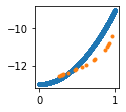

32/32 [==============================] - 1s 39ms/step - gen_loss: 0.7005 - disc_loss: 0.6894
Epoch 8002/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7083 - disc_loss: 0.6835
Epoch 8003/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7116 - disc_loss: 0.6796
Epoch 8004/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7105 - disc_loss: 0.6805
Epoch 8005/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7014 - disc_loss: 0.6867
Epoch 8006/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6885 - disc_loss: 0.6962
Epoch 8007/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6777 - disc_loss: 0.7041
Epoch 8008/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6724 - disc_loss: 0.7097
Epoch 8009/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6705 - disc_loss: 0.7096
Epoch 8010/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6916 - disc_loss: 0.6940
Epoch 8076/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6910 - disc_loss: 0.6941
Epoch 8077/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6907 - disc_loss: 0.6944
Epoch 8078/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6902 - disc_loss: 0.6944
Epoch 8079/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6901 - disc_loss: 0.6944
Epoch 8080/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6904 - disc_loss: 0.6941
Epoch 8081/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6909 - disc_loss: 0.6939
Epoch 8082/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6915 - disc_loss: 0.6933
Epoch 8083/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6925 - disc_loss: 0.6927
Epoch 8084/20000
32/32 [=======

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6911 - disc_loss: 0.6955
Epoch 8150/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6904 - disc_loss: 0.6964
Epoch 8151/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6908 - disc_loss: 0.6967
Epoch 8152/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6920 - disc_loss: 0.6962
Epoch 8153/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6942 - disc_loss: 0.6953
Epoch 8154/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6964 - disc_loss: 0.6940
Epoch 8155/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6987 - disc_loss: 0.6927
Epoch 8156/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6998 - disc_loss: 0.6916
Epoch 8157/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7003 - disc_loss: 0.6907
Epoch 8158/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6985 - disc_loss: 0.6872
Epoch 8224/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6961 - disc_loss: 0.6898
Epoch 8225/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6913 - disc_loss: 0.6939
Epoch 8226/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6867 - disc_loss: 0.6984
Epoch 8227/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6839 - disc_loss: 0.7005
Epoch 8228/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6879 - disc_loss: 0.6996
Epoch 8229/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6952 - disc_loss: 0.6958
Epoch 8230/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7020 - disc_loss: 0.6909
Epoch 8231/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7033 - disc_loss: 0.6875
Epoch 8232/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6892 - disc_loss: 0.6966
Epoch 8298/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6883 - disc_loss: 0.6974
Epoch 8299/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6868 - disc_loss: 0.6978
Epoch 8300/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6865 - disc_loss: 0.6973
Epoch 8301/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6871 - disc_loss: 0.6960
Epoch 8302/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6893 - disc_loss: 0.6935
Epoch 8303/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6949 - disc_loss: 0.6903
Epoch 8304/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6996 - disc_loss: 0.6873
Epoch 8305/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7024 - disc_loss: 0.6859
Epoch 8306/20000
32/32 [=======

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6818 - disc_loss: 0.6995
Epoch 8372/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6795 - disc_loss: 0.7004
Epoch 8373/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6776 - disc_loss: 0.7004
Epoch 8374/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6786 - disc_loss: 0.6989
Epoch 8375/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6823 - disc_loss: 0.6952
Epoch 8376/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6890 - disc_loss: 0.6902
Epoch 8377/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6971 - disc_loss: 0.6851
Epoch 8378/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6999 - disc_loss: 0.6825
Epoch 8379/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6992 - disc_loss: 0.6841
Epoch 8380/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7011 - disc_loss: 0.6990
Epoch 8446/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6966 - disc_loss: 0.6994
Epoch 8447/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6923 - disc_loss: 0.7000
Epoch 8448/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6888 - disc_loss: 0.7004
Epoch 8449/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6854 - disc_loss: 0.7007
Epoch 8450/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6831 - disc_loss: 0.7004
Epoch 8451/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6821 - disc_loss: 0.6994
Epoch 8452/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6825 - disc_loss: 0.6975
Epoch 8453/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6862 - disc_loss: 0.6946
Epoch 8454/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6969 - disc_loss: 0.6865
Epoch 8520/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6965 - disc_loss: 0.6856
Epoch 8521/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6954 - disc_loss: 0.6858
Epoch 8522/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6948 - disc_loss: 0.6871
Epoch 8523/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6924 - disc_loss: 0.6888
Epoch 8524/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6899 - disc_loss: 0.6908
Epoch 8525/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6893 - disc_loss: 0.6933
Epoch 8526/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6876 - disc_loss: 0.6967
Epoch 8527/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6909 - disc_loss: 0.6987
Epoch 8528/20000
32/32 [===

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6935 - disc_loss: 0.6925
Epoch 8594/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6939 - disc_loss: 0.6921
Epoch 8595/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6942 - disc_loss: 0.6918
Epoch 8596/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6939 - disc_loss: 0.6920
Epoch 8597/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6941 - disc_loss: 0.6927
Epoch 8598/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6939 - disc_loss: 0.6937
Epoch 8599/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6939 - disc_loss: 0.6948
Epoch 8600/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6934 - disc_loss: 0.6959
Epoch 8601/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6928 - disc_loss: 0.6967
Epoch 8602/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6816 - disc_loss: 0.6971
Epoch 8668/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6805 - disc_loss: 0.6968
Epoch 8669/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6798 - disc_loss: 0.6969
Epoch 8670/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6797 - disc_loss: 0.6968
Epoch 8671/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6802 - disc_loss: 0.6958
Epoch 8672/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6802 - disc_loss: 0.6949
Epoch 8673/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6799 - disc_loss: 0.6942
Epoch 8674/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6802 - disc_loss: 0.6934
Epoch 8675/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6806 - disc_loss: 0.6927
Epoch 8676/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6800 - disc_loss: 0.6917
Epoch 8742/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6837 - disc_loss: 0.6886
Epoch 8743/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6882 - disc_loss: 0.6864
Epoch 8744/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6928 - disc_loss: 0.6849
Epoch 8745/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6934 - disc_loss: 0.6861
Epoch 8746/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6911 - disc_loss: 0.6904
Epoch 8747/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6884 - disc_loss: 0.6969
Epoch 8748/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6891 - disc_loss: 0.7004
Epoch 8749/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6948 - disc_loss: 0.7004
Epoch 8750/20000
32/32 [===

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6869 - disc_loss: 0.6904
Epoch 8816/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6937 - disc_loss: 0.6936
Epoch 8817/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6935 - disc_loss: 0.6927
Epoch 8818/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6932 - disc_loss: 0.6971
Epoch 8819/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7103 - disc_loss: 0.6968
Epoch 8820/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7022 - disc_loss: 0.6874
Epoch 8821/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7092 - disc_loss: 0.6866
Epoch 8822/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7174 - disc_loss: 0.6942
Epoch 8823/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6989 - disc_loss: 0.6942
Epoch 8824/20000
32/32 [===

32/32 [==============================] - 0s 15ms/step - gen_loss: 0.6934 - disc_loss: 0.6961
Epoch 8890/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6971 - disc_loss: 0.6939
Epoch 8891/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6984 - disc_loss: 0.6924
Epoch 8892/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6983 - disc_loss: 0.6919
Epoch 8893/20000
32/32 [==============================] - 1s 25ms/step - gen_loss: 0.6959 - disc_loss: 0.6924
Epoch 8894/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6932 - disc_loss: 0.6940
Epoch 8895/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6885 - disc_loss: 0.6961
Epoch 8896/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6853 - disc_loss: 0.6973
Epoch 8897/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6848 - disc_loss: 0.6970
Epoch 8898/20000
32/32 [===

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6969 - disc_loss: 0.6929
Epoch 8964/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6964 - disc_loss: 0.6925
Epoch 8965/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6943 - disc_loss: 0.6926
Epoch 8966/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6928 - disc_loss: 0.6930
Epoch 8967/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6921 - disc_loss: 0.6935
Epoch 8968/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6910 - disc_loss: 0.6938
Epoch 8969/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6904 - disc_loss: 0.6937
Epoch 8970/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6911 - disc_loss: 0.6934
Epoch 8971/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6915 - disc_loss: 0.6929
Epoch 8972/20000
32/32 [===

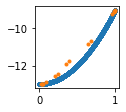

32/32 [==============================] - 1s 29ms/step - gen_loss: 0.6852 - disc_loss: 0.6976
Epoch 9002/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6892 - disc_loss: 0.6962
Epoch 9003/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6892 - disc_loss: 0.6947
Epoch 9004/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6911 - disc_loss: 0.6928
Epoch 9005/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6930 - disc_loss: 0.6911
Epoch 9006/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6940 - disc_loss: 0.6898
Epoch 9007/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6953 - disc_loss: 0.6891
Epoch 9008/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6933 - disc_loss: 0.6889
Epoch 9009/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6938 - disc_loss: 0.6894
Epoch 9010/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7006 - disc_loss: 0.6917
Epoch 9076/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6746 - disc_loss: 0.6930
Epoch 9077/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6764 - disc_loss: 0.6905
Epoch 9078/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6909 - disc_loss: 0.6894
Epoch 9079/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7015 - disc_loss: 0.6944
Epoch 9080/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7104 - disc_loss: 0.6933
Epoch 9081/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7075 - disc_loss: 0.6918
Epoch 9082/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6993 - disc_loss: 0.6924
Epoch 9083/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6873 - disc_loss: 0.6937
Epoch 9084/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6872 - disc_loss: 0.6949
Epoch 9150/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6882 - disc_loss: 0.6936
Epoch 9151/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6896 - disc_loss: 0.6919
Epoch 9152/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6915 - disc_loss: 0.6909
Epoch 9153/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6919 - disc_loss: 0.6895
Epoch 9154/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6928 - disc_loss: 0.6882
Epoch 9155/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6949 - disc_loss: 0.6870
Epoch 9156/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6944 - disc_loss: 0.6862
Epoch 9157/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6947 - disc_loss: 0.6863
Epoch 9158/20000
32/32 [=======

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6979 - disc_loss: 0.6908
Epoch 9224/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6990 - disc_loss: 0.6893
Epoch 9225/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7015 - disc_loss: 0.6880
Epoch 9226/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7022 - disc_loss: 0.6874
Epoch 9227/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7021 - disc_loss: 0.6872
Epoch 9228/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7000 - disc_loss: 0.6887
Epoch 9229/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6955 - disc_loss: 0.6918
Epoch 9230/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6911 - disc_loss: 0.6956
Epoch 9231/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6862 - disc_loss: 0.6988
Epoch 9232/20000
32/32 [===

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6889 - disc_loss: 0.6950
Epoch 9298/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6887 - disc_loss: 0.6967
Epoch 9299/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6880 - disc_loss: 0.6975
Epoch 9300/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6896 - disc_loss: 0.6963
Epoch 9301/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6931 - disc_loss: 0.6937
Epoch 9302/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6942 - disc_loss: 0.6927
Epoch 9303/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6945 - disc_loss: 0.6923
Epoch 9304/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6941 - disc_loss: 0.6921
Epoch 9305/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6939 - disc_loss: 0.6921
Epoch 9306/20000
32/32 [=====

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6996 - disc_loss: 0.6918
Epoch 9372/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6997 - disc_loss: 0.6910
Epoch 9373/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6976 - disc_loss: 0.6916
Epoch 9374/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6944 - disc_loss: 0.6929
Epoch 9375/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6909 - disc_loss: 0.6944
Epoch 9376/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6897 - disc_loss: 0.6949
Epoch 9377/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6893 - disc_loss: 0.6946
Epoch 9378/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6904 - disc_loss: 0.6936
Epoch 9379/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6912 - disc_loss: 0.6928
Epoch 9380/20000
32/32 [======

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6924 - disc_loss: 0.6938
Epoch 9446/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6925 - disc_loss: 0.6958
Epoch 9447/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6938 - disc_loss: 0.6974
Epoch 9448/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6958 - disc_loss: 0.6979
Epoch 9449/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7016 - disc_loss: 0.6959
Epoch 9450/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7077 - disc_loss: 0.6921
Epoch 9451/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7084 - disc_loss: 0.6898
Epoch 9452/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7033 - disc_loss: 0.6906
Epoch 9453/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6961 - disc_loss: 0.6928
Epoch 9454/20000
32/32 [====

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6903 - disc_loss: 0.6948
Epoch 9520/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6896 - disc_loss: 0.6942
Epoch 9521/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6861 - disc_loss: 0.6950
Epoch 9522/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6869 - disc_loss: 0.6950
Epoch 9523/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6892 - disc_loss: 0.6942
Epoch 9524/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6914 - disc_loss: 0.6932
Epoch 9525/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6936 - disc_loss: 0.6923
Epoch 9526/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6946 - disc_loss: 0.6917
Epoch 9527/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6954 - disc_loss: 0.6916
Epoch 9528/20000
32/32 [====

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6897 - disc_loss: 0.6931
Epoch 9594/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6925 - disc_loss: 0.6921
Epoch 9595/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6936 - disc_loss: 0.6915
Epoch 9596/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6946 - disc_loss: 0.6915
Epoch 9597/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6940 - disc_loss: 0.6920
Epoch 9598/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6933 - disc_loss: 0.6935
Epoch 9599/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6938 - disc_loss: 0.6953
Epoch 9600/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6932 - disc_loss: 0.6952
Epoch 9601/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6951 - disc_loss: 0.6947
Epoch 9602/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6898 - disc_loss: 0.6918
Epoch 9668/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6892 - disc_loss: 0.6905
Epoch 9669/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6893 - disc_loss: 0.6896
Epoch 9670/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6897 - disc_loss: 0.6899
Epoch 9671/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6914 - disc_loss: 0.6914
Epoch 9672/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6958 - disc_loss: 0.6922
Epoch 9673/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6987 - disc_loss: 0.6901
Epoch 9674/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6974 - disc_loss: 0.6883
Epoch 9675/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6910 - disc_loss: 0.6917
Epoch 9676/20000
32/32 [====

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7007 - disc_loss: 0.6930
Epoch 9742/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7272 - disc_loss: 0.6913
Epoch 9743/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6809 - disc_loss: 0.6959
Epoch 9744/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6761 - disc_loss: 0.6941
Epoch 9745/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6918 - disc_loss: 0.6937
Epoch 9746/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6913 - disc_loss: 0.6934
Epoch 9747/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6905 - disc_loss: 0.6931
Epoch 9748/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6902 - disc_loss: 0.6928
Epoch 9749/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6897 - disc_loss: 0.6926
Epoch 9750/20000
32/32 [===

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6891 - disc_loss: 0.6918
Epoch 9816/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6909 - disc_loss: 0.6924
Epoch 9817/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6924 - disc_loss: 0.6934
Epoch 9818/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6952 - disc_loss: 0.6945
Epoch 9819/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6984 - disc_loss: 0.6947
Epoch 9820/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7785 - disc_loss: 0.6876
Epoch 9821/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6368 - disc_loss: 0.7034
Epoch 9822/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6661 - disc_loss: 0.6930
Epoch 9823/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6919 - disc_loss: 0.6925
Epoch 9824/20000
32/32 [===

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7288 - disc_loss: 0.7024
Epoch 9890/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7573 - disc_loss: 0.6945
Epoch 9891/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7789 - disc_loss: 0.6808
Epoch 9892/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7537 - disc_loss: 0.6750
Epoch 9893/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7088 - disc_loss: 0.6886
Epoch 9894/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6715 - disc_loss: 0.7033
Epoch 9895/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6576 - disc_loss: 0.7083
Epoch 9896/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6529 - disc_loss: 0.7037
Epoch 9897/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6561 - disc_loss: 0.6981
Epoch 9898/20000
32/32 [===

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6793 - disc_loss: 0.6911
Epoch 9964/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6815 - disc_loss: 0.6912
Epoch 9965/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6829 - disc_loss: 0.6915
Epoch 9966/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6843 - disc_loss: 0.6918
Epoch 9967/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6858 - disc_loss: 0.6923
Epoch 9968/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6873 - disc_loss: 0.6930
Epoch 9969/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6895 - disc_loss: 0.6937
Epoch 9970/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6919 - disc_loss: 0.6944
Epoch 9971/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6945 - disc_loss: 0.6951
Epoch 9972/20000
32/32 [======

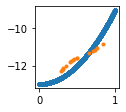

32/32 [==============================] - 1s 36ms/step - gen_loss: 0.6776 - disc_loss: 0.6890
Epoch 10002/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6836 - disc_loss: 0.6942
Epoch 10003/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6931 - disc_loss: 0.6991
Epoch 10004/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7042 - disc_loss: 0.7022
Epoch 10005/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7169 - disc_loss: 0.7011
Epoch 10006/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7331 - disc_loss: 0.6963
Epoch 10007/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7534 - disc_loss: 0.6880
Epoch 10008/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7558 - disc_loss: 0.6809
Epoch 10009/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7419 - disc_loss: 0.6827
Epoch 10010/20000
32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6610 - disc_loss: 0.6929
Epoch 10076/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6662 - disc_loss: 0.6837
Epoch 10077/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6697 - disc_loss: 0.6783
Epoch 10078/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6741 - disc_loss: 0.6757
Epoch 10079/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6789 - disc_loss: 0.6750
Epoch 10080/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6825 - disc_loss: 0.6757
Epoch 10081/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6847 - disc_loss: 0.6784
Epoch 10082/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6863 - disc_loss: 0.6827
Epoch 10083/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6870 - disc_loss: 0.6893
Epoch 10084/20000
32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6871 - disc_loss: 0.6941
Epoch 10150/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6862 - disc_loss: 0.6936
Epoch 10151/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6858 - disc_loss: 0.6927
Epoch 10152/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6856 - disc_loss: 0.6917
Epoch 10153/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6856 - disc_loss: 0.6907
Epoch 10154/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6859 - disc_loss: 0.6899
Epoch 10155/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6862 - disc_loss: 0.6893
Epoch 10156/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6869 - disc_loss: 0.6894
Epoch 10157/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6876 - disc_loss: 0.6901
Epoch 10158/20000
3

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6732 - disc_loss: 0.6781
Epoch 10224/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6764 - disc_loss: 0.6763
Epoch 10225/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6785 - disc_loss: 0.6771
Epoch 10226/20000
32/32 [==============================] - 1s 15ms/step - gen_loss: 0.6798 - disc_loss: 0.6813
Epoch 10227/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6795 - disc_loss: 0.6895
Epoch 10228/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6794 - disc_loss: 0.7006
Epoch 10229/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6825 - disc_loss: 0.7135
Epoch 10230/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6959 - disc_loss: 0.7218
Epoch 10231/20000
32/32 [==============================] - 0s 15ms/step - gen_loss: 0.7296 - disc_loss: 0.7173
Epoch 10232/20000
3

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6878 - disc_loss: 0.6778
Epoch 10298/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6852 - disc_loss: 0.6848
Epoch 10299/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6780 - disc_loss: 0.6969
Epoch 10300/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6615 - disc_loss: 0.7168
Epoch 10301/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6596 - disc_loss: 0.7349
Epoch 10302/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6961 - disc_loss: 0.7354
Epoch 10303/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7582 - disc_loss: 0.7120
Epoch 10304/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.8109 - disc_loss: 0.6726
Epoch 10305/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.8495 - disc_loss: 0.6344
Epoch 10306/20000
32/

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6480 - disc_loss: 0.7039
Epoch 10372/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6512 - disc_loss: 0.6974
Epoch 10373/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6585 - disc_loss: 0.6904
Epoch 10374/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6666 - disc_loss: 0.6847
Epoch 10375/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6729 - disc_loss: 0.6810
Epoch 10376/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6776 - disc_loss: 0.6803
Epoch 10377/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6810 - disc_loss: 0.6826
Epoch 10378/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6825 - disc_loss: 0.6866
Epoch 10379/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6856 - disc_loss: 0.6939
Epoch 10380/20000
3

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7161 - disc_loss: 0.6951
Epoch 10446/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7711 - disc_loss: 0.6842
Epoch 10447/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7744 - disc_loss: 0.6848
Epoch 10448/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7288 - disc_loss: 0.6964
Epoch 10449/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6833 - disc_loss: 0.7029
Epoch 10450/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6629 - disc_loss: 0.7015
Epoch 10451/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6561 - disc_loss: 0.6946
Epoch 10452/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6663 - disc_loss: 0.6922
Epoch 10453/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6746 - disc_loss: 0.6902
Epoch 10454/20000
32

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7232 - disc_loss: 0.6904
Epoch 10520/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7569 - disc_loss: 0.6862
Epoch 10521/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7176 - disc_loss: 0.6926
Epoch 10522/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6911 - disc_loss: 0.7020
Epoch 10523/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6691 - disc_loss: 0.7026
Epoch 10524/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6674 - disc_loss: 0.6968
Epoch 10525/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6730 - disc_loss: 0.6915
Epoch 10526/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6837 - disc_loss: 0.6899
Epoch 10527/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6878 - disc_loss: 0.6888
Epoch 10528/20000
3

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6901 - disc_loss: 0.6954
Epoch 10594/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6915 - disc_loss: 0.6966
Epoch 10595/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6935 - disc_loss: 0.6974
Epoch 10596/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6962 - disc_loss: 0.6976
Epoch 10597/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6996 - disc_loss: 0.6970
Epoch 10598/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7181 - disc_loss: 0.6913
Epoch 10599/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7912 - disc_loss: 0.6843
Epoch 10600/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6786 - disc_loss: 0.6997
Epoch 10601/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6596 - disc_loss: 0.6942
Epoch 10602/20000
32/32 [

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6894 - disc_loss: 0.6915
Epoch 10668/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6901 - disc_loss: 0.6968
Epoch 10669/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6937 - disc_loss: 0.7012
Epoch 10670/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7071 - disc_loss: 0.6985
Epoch 10671/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7664 - disc_loss: 0.6841
Epoch 10672/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7526 - disc_loss: 0.6893
Epoch 10673/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6768 - disc_loss: 0.7114
Epoch 10674/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6577 - disc_loss: 0.7076
Epoch 10675/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6636 - disc_loss: 0.6962
Epoch 10676/20000
3

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7964 - disc_loss: 0.6551
Epoch 10742/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7819 - disc_loss: 0.6565
Epoch 10743/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7414 - disc_loss: 0.6775
Epoch 10744/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6963 - disc_loss: 0.7025
Epoch 10745/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6650 - disc_loss: 0.7184
Epoch 10746/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6520 - disc_loss: 0.7218
Epoch 10747/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6533 - disc_loss: 0.7182
Epoch 10748/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6559 - disc_loss: 0.7119
Epoch 10749/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6618 - disc_loss: 0.7052
Epoch 10750/20000
3

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7155 - disc_loss: 0.6947
Epoch 10816/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7211 - disc_loss: 0.6920
Epoch 10817/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7263 - disc_loss: 0.6883
Epoch 10818/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7246 - disc_loss: 0.6851
Epoch 10819/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7169 - disc_loss: 0.6849
Epoch 10820/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7042 - disc_loss: 0.6893
Epoch 10821/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6900 - disc_loss: 0.6954
Epoch 10822/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6784 - disc_loss: 0.7011
Epoch 10823/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6705 - disc_loss: 0.7020
Epoch 10824/20000
32/32 [

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6032 - disc_loss: 0.7269
Epoch 10890/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6551 - disc_loss: 0.6968
Epoch 10891/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7218 - disc_loss: 0.6917
Epoch 10892/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7184 - disc_loss: 0.6902
Epoch 10893/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7111 - disc_loss: 0.6896
Epoch 10894/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7041 - disc_loss: 0.6899
Epoch 10895/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6970 - disc_loss: 0.6911
Epoch 10896/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6883 - disc_loss: 0.6930
Epoch 10897/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6824 - disc_loss: 0.6952
Epoch 10898/20000
32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7125 - disc_loss: 0.6873
Epoch 10964/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6993 - disc_loss: 0.6919
Epoch 10965/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6868 - disc_loss: 0.6980
Epoch 10966/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6765 - disc_loss: 0.7005
Epoch 10967/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6713 - disc_loss: 0.6972
Epoch 10968/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6753 - disc_loss: 0.6923
Epoch 10969/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6822 - disc_loss: 0.6889
Epoch 10970/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6876 - disc_loss: 0.6888
Epoch 10971/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6802 - disc_loss: 0.6895
Epoch 10972/20000
32/3

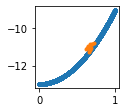

32/32 [==============================] - 1s 24ms/step - gen_loss: 0.7222 - disc_loss: 0.6847
Epoch 11002/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7039 - disc_loss: 0.6892
Epoch 11003/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7013 - disc_loss: 0.6907
Epoch 11004/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7231 - disc_loss: 0.6848
Epoch 11005/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7015 - disc_loss: 0.6901
Epoch 11006/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6843 - disc_loss: 0.6975
Epoch 11007/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6767 - disc_loss: 0.7007
Epoch 11008/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6794 - disc_loss: 0.7013
Epoch 11009/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6815 - disc_loss: 0.7006
Epoch 11010/20000
3

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7165 - disc_loss: 0.6953
Epoch 11076/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7426 - disc_loss: 0.6726
Epoch 11077/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7342 - disc_loss: 0.6567
Epoch 11078/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7241 - disc_loss: 0.6534
Epoch 11079/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7179 - disc_loss: 0.6606
Epoch 11080/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7059 - disc_loss: 0.6755
Epoch 11081/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6924 - disc_loss: 0.6931
Epoch 11082/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6790 - disc_loss: 0.7095
Epoch 11083/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6714 - disc_loss: 0.7211
Epoch 11084/20000
32/32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7053 - disc_loss: 0.6867
Epoch 11150/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7047 - disc_loss: 0.6875
Epoch 11151/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7040 - disc_loss: 0.6887
Epoch 11152/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7000 - disc_loss: 0.6900
Epoch 11153/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6972 - disc_loss: 0.6917
Epoch 11154/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6927 - disc_loss: 0.6942
Epoch 11155/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6857 - disc_loss: 0.6983
Epoch 11156/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6793 - disc_loss: 0.7028
Epoch 11157/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6747 - disc_loss: 0.7045
Epoch 11158/20000
32/32

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7150 - disc_loss: 0.6711
Epoch 11224/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7145 - disc_loss: 0.6709
Epoch 11225/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7076 - disc_loss: 0.6766
Epoch 11226/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6974 - disc_loss: 0.6840
Epoch 11227/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6807 - disc_loss: 0.6996
Epoch 11228/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6998 - disc_loss: 0.7127
Epoch 11229/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7114 - disc_loss: 0.7123
Epoch 11230/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7128 - disc_loss: 0.7082
Epoch 11231/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7141 - disc_loss: 0.7038
Epoch 11232/20000
32/32 [

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6921 - disc_loss: 0.6969
Epoch 11298/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6910 - disc_loss: 0.6977
Epoch 11299/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6908 - disc_loss: 0.6972
Epoch 11300/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6947 - disc_loss: 0.6960
Epoch 11301/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7049 - disc_loss: 0.6927
Epoch 11302/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7184 - disc_loss: 0.6881
Epoch 11303/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7158 - disc_loss: 0.6856
Epoch 11304/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7108 - disc_loss: 0.6850
Epoch 11305/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7029 - disc_loss: 0.6880
Epoch 11306/20000
32/32 

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6913 - disc_loss: 0.6952
Epoch 11372/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6927 - disc_loss: 0.6941
Epoch 11373/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6944 - disc_loss: 0.6924
Epoch 11374/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6958 - disc_loss: 0.6907
Epoch 11375/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6964 - disc_loss: 0.6897
Epoch 11376/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6960 - disc_loss: 0.6900
Epoch 11377/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6939 - disc_loss: 0.6919
Epoch 11378/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6912 - disc_loss: 0.6950
Epoch 11379/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6893 - disc_loss: 0.6970
Epoch 11380/20000
32/32 [=

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6683 - disc_loss: 0.6947
Epoch 11446/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6768 - disc_loss: 0.6919
Epoch 11447/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6828 - disc_loss: 0.6896
Epoch 11448/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6869 - disc_loss: 0.6878
Epoch 11449/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6904 - disc_loss: 0.6866
Epoch 11450/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6928 - disc_loss: 0.6861
Epoch 11451/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6957 - disc_loss: 0.6863
Epoch 11452/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6996 - disc_loss: 0.6875
Epoch 11453/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7047 - disc_loss: 0.6886
Epoch 11454/20000
32/32 

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7089 - disc_loss: 0.6891
Epoch 11520/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7079 - disc_loss: 0.6883
Epoch 11521/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7080 - disc_loss: 0.6889
Epoch 11522/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7019 - disc_loss: 0.6901
Epoch 11523/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6945 - disc_loss: 0.6932
Epoch 11524/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6858 - disc_loss: 0.6961
Epoch 11525/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6835 - disc_loss: 0.6960
Epoch 11526/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6860 - disc_loss: 0.6951
Epoch 11527/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6874 - disc_loss: 0.6949
Epoch 11528/20000
32/32 [

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6904 - disc_loss: 0.6960
Epoch 11594/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6900 - disc_loss: 0.6954
Epoch 11595/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6906 - disc_loss: 0.6950
Epoch 11596/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6906 - disc_loss: 0.6946
Epoch 11597/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6906 - disc_loss: 0.6943
Epoch 11598/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6903 - disc_loss: 0.6942
Epoch 11599/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6904 - disc_loss: 0.6940
Epoch 11600/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6911 - disc_loss: 0.6940
Epoch 11601/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6916 - disc_loss: 0.6937
Epoch 11602/20000
32/

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6928 - disc_loss: 0.6933
Epoch 11668/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6927 - disc_loss: 0.6948
Epoch 11669/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6912 - disc_loss: 0.6953
Epoch 11670/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6924 - disc_loss: 0.6952
Epoch 11671/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6939 - disc_loss: 0.6940
Epoch 11672/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6962 - disc_loss: 0.6924
Epoch 11673/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6979 - disc_loss: 0.6908
Epoch 11674/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6985 - disc_loss: 0.6900
Epoch 11675/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6975 - disc_loss: 0.6903
Epoch 11676/20000
32/32 

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6911 - disc_loss: 0.6935
Epoch 11742/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6913 - disc_loss: 0.6939
Epoch 11743/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6915 - disc_loss: 0.6941
Epoch 11744/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6933 - disc_loss: 0.6939
Epoch 11745/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6948 - disc_loss: 0.6932
Epoch 11746/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6944 - disc_loss: 0.6928
Epoch 11747/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6933 - disc_loss: 0.6935
Epoch 11748/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6899 - disc_loss: 0.6943
Epoch 11749/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6898 - disc_loss: 0.6943
Epoch 11750/20000
32/3

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6739 - disc_loss: 0.6981
Epoch 11816/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6937 - disc_loss: 0.6914
Epoch 11817/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6954 - disc_loss: 0.6907
Epoch 11818/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6951 - disc_loss: 0.6916
Epoch 11819/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6936 - disc_loss: 0.6930
Epoch 11820/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6919 - disc_loss: 0.6942
Epoch 11821/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6924 - disc_loss: 0.6947
Epoch 11822/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6947 - disc_loss: 0.6942
Epoch 11823/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7083 - disc_loss: 0.6910
Epoch 11824/20000
32/32 [=

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6790 - disc_loss: 0.6965
Epoch 11890/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6959 - disc_loss: 0.6922
Epoch 11891/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6952 - disc_loss: 0.6915
Epoch 11892/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6951 - disc_loss: 0.6918
Epoch 11893/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6929 - disc_loss: 0.6928
Epoch 11894/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6911 - disc_loss: 0.6938
Epoch 11895/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6899 - disc_loss: 0.6944
Epoch 11896/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6892 - disc_loss: 0.6946
Epoch 11897/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6964 - disc_loss: 0.6928
Epoch 11898/20000
32/32 

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6887 - disc_loss: 0.6951
Epoch 11964/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6886 - disc_loss: 0.6952
Epoch 11965/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6876 - disc_loss: 0.6954
Epoch 11966/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6886 - disc_loss: 0.6953
Epoch 11967/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6883 - disc_loss: 0.6951
Epoch 11968/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6897 - disc_loss: 0.6948
Epoch 11969/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6900 - disc_loss: 0.6946
Epoch 11970/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6918 - disc_loss: 0.6942
Epoch 11971/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6925 - disc_loss: 0.6937
Epoch 11972/20000
32/32 

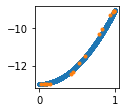

32/32 [==============================] - 1s 23ms/step - gen_loss: 0.6902 - disc_loss: 0.6938
Epoch 12002/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6914 - disc_loss: 0.6936
Epoch 12003/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6917 - disc_loss: 0.6935
Epoch 12004/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6919 - disc_loss: 0.6941
Epoch 12005/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6921 - disc_loss: 0.6945
Epoch 12006/20000
32/32 [==============================] - 0s 3ms/step - gen_loss: 0.6915 - disc_loss: 0.6944
Epoch 12007/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6945
Epoch 12008/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6939 - disc_loss: 0.6939
Epoch 12009/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6950 - disc_loss: 0.6927
Epoch 12010/20000
32/32 [

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6899 - disc_loss: 0.6973
Epoch 12076/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6913 - disc_loss: 0.6962
Epoch 12077/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6937 - disc_loss: 0.6946
Epoch 12078/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6956 - disc_loss: 0.6934
Epoch 12079/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7083 - disc_loss: 0.6903
Epoch 12080/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7374 - disc_loss: 0.6841
Epoch 12081/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6697 - disc_loss: 0.7019
Epoch 12082/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6388 - disc_loss: 0.7026
Epoch 12083/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6742 - disc_loss: 0.6924
Epoch 12084/20000
32/3

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6881 - disc_loss: 0.6940
Epoch 12150/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6883 - disc_loss: 0.6938
Epoch 12151/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6898 - disc_loss: 0.6935
Epoch 12152/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6913 - disc_loss: 0.6934
Epoch 12153/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6929 - disc_loss: 0.6933
Epoch 12154/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6936 - disc_loss: 0.6930
Epoch 12155/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6939 - disc_loss: 0.6930
Epoch 12156/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6978 - disc_loss: 0.6928
Epoch 12157/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6969 - disc_loss: 0.6924
Epoch 12158/20000
32/32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6977 - disc_loss: 0.6926
Epoch 12224/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6984 - disc_loss: 0.6922
Epoch 12225/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6987 - disc_loss: 0.6916
Epoch 12226/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6976 - disc_loss: 0.6919
Epoch 12227/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6931 - disc_loss: 0.6923
Epoch 12228/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6894 - disc_loss: 0.6930
Epoch 12229/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6895 - disc_loss: 0.6929
Epoch 12230/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6876 - disc_loss: 0.6928
Epoch 12231/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6888 - disc_loss: 0.6927
Epoch 12232/20000
32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6858 - disc_loss: 0.6917
Epoch 12298/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6862 - disc_loss: 0.6906
Epoch 12299/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6862 - disc_loss: 0.6891
Epoch 12300/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6872 - disc_loss: 0.6861
Epoch 12301/20000
32/32 [==============================] - 0s 15ms/step - gen_loss: 0.6625 - disc_loss: 0.6708
Epoch 12302/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7154 - disc_loss: 0.6610
Epoch 12303/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7098 - disc_loss: 0.7164
Epoch 12304/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7830 - disc_loss: 0.7268
Epoch 12305/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7042 - disc_loss: 0.7094
Epoch 12306/20000
32/

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6862 - disc_loss: 0.6943
Epoch 12372/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6860 - disc_loss: 0.6941
Epoch 12373/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6868 - disc_loss: 0.6938
Epoch 12374/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6867 - disc_loss: 0.6932
Epoch 12375/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6873 - disc_loss: 0.6928
Epoch 12376/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6879 - disc_loss: 0.6926
Epoch 12377/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6888 - disc_loss: 0.6922
Epoch 12378/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6891 - disc_loss: 0.6918
Epoch 12379/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6902 - disc_loss: 0.6919
Epoch 12380/20000
3

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7093 - disc_loss: 0.6917
Epoch 12446/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7156 - disc_loss: 0.6880
Epoch 12447/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7150 - disc_loss: 0.6867
Epoch 12448/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7079 - disc_loss: 0.6883
Epoch 12449/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6982 - disc_loss: 0.6915
Epoch 12450/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6908 - disc_loss: 0.6942
Epoch 12451/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6856 - disc_loss: 0.6962
Epoch 12452/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6816 - disc_loss: 0.6972
Epoch 12453/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6800 - disc_loss: 0.6975
Epoch 12454/20000
32/

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7029 - disc_loss: 0.6904
Epoch 12520/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7051 - disc_loss: 0.6895
Epoch 12521/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7007 - disc_loss: 0.6897
Epoch 12522/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6912 - disc_loss: 0.6933
Epoch 12523/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6838 - disc_loss: 0.6963
Epoch 12524/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6810 - disc_loss: 0.6977
Epoch 12525/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6813 - disc_loss: 0.6969
Epoch 12526/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6841 - disc_loss: 0.6957
Epoch 12527/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6891 - disc_loss: 0.6942
Epoch 12528/20000
32

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6866 - disc_loss: 0.6993
Epoch 12594/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6882 - disc_loss: 0.6985
Epoch 12595/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6889 - disc_loss: 0.6976
Epoch 12596/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6895 - disc_loss: 0.6962
Epoch 12597/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6905 - disc_loss: 0.6954
Epoch 12598/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6911 - disc_loss: 0.6944
Epoch 12599/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6925 - disc_loss: 0.6931
Epoch 12600/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6935 - disc_loss: 0.6918
Epoch 12601/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6943 - disc_loss: 0.6907
Epoch 12602/20000
3

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6909 - disc_loss: 0.6949
Epoch 12668/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6919 - disc_loss: 0.6947
Epoch 12669/20000
32/32 [==============================] - 0s 15ms/step - gen_loss: 0.6922 - disc_loss: 0.6945
Epoch 12670/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6926 - disc_loss: 0.6942
Epoch 12671/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6929 - disc_loss: 0.6939
Epoch 12672/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6930 - disc_loss: 0.6936
Epoch 12673/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6933 - disc_loss: 0.6934
Epoch 12674/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6936 - disc_loss: 0.6931
Epoch 12675/20000
32/32 [==============================] - 1s 16ms/step - gen_loss: 0.6938 - disc_loss: 0.6927
Epoch 12676/20000
3

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7083 - disc_loss: 0.6887
Epoch 12742/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7059 - disc_loss: 0.6874
Epoch 12743/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6995 - disc_loss: 0.6893
Epoch 12744/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6939 - disc_loss: 0.6895
Epoch 12745/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7152 - disc_loss: 0.6844
Epoch 12746/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7072 - disc_loss: 0.6917
Epoch 12747/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6615 - disc_loss: 0.7133
Epoch 12748/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6487 - disc_loss: 0.7062
Epoch 12749/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6580 - disc_loss: 0.6949
Epoch 12750/20000
32/

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6883 - disc_loss: 0.6916
Epoch 12816/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6912 - disc_loss: 0.6916
Epoch 12817/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6901 - disc_loss: 0.6915
Epoch 12818/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7171 - disc_loss: 0.6775
Epoch 12819/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7443 - disc_loss: 0.6708
Epoch 12820/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7449 - disc_loss: 0.6950
Epoch 12821/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7370 - disc_loss: 0.7053
Epoch 12822/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7434 - disc_loss: 0.6955
Epoch 12823/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7552 - disc_loss: 0.6835
Epoch 12824/20000
32/32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6912 - disc_loss: 0.6918
Epoch 12890/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6927 - disc_loss: 0.6926
Epoch 12891/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6921 - disc_loss: 0.6939
Epoch 12892/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6928 - disc_loss: 0.6950
Epoch 12893/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6944 - disc_loss: 0.6957
Epoch 12894/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6949 - disc_loss: 0.6966
Epoch 12895/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6974 - disc_loss: 0.6973
Epoch 12896/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7010 - disc_loss: 0.6978
Epoch 12897/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7063 - disc_loss: 0.6968
Epoch 12898/20000
3

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6927 - disc_loss: 0.7009
Epoch 12964/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.7003 - disc_loss: 0.6986
Epoch 12965/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7091 - disc_loss: 0.6948
Epoch 12966/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7185 - disc_loss: 0.6904
Epoch 12967/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7227 - disc_loss: 0.6868
Epoch 12968/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7225 - disc_loss: 0.6850
Epoch 12969/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7188 - disc_loss: 0.6852
Epoch 12970/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7118 - disc_loss: 0.6868
Epoch 12971/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7034 - disc_loss: 0.6893
Epoch 12972/20000
3

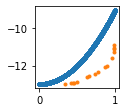

32/32 [==============================] - 1s 23ms/step - gen_loss: 0.7192 - disc_loss: 0.6917
Epoch 13002/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7277 - disc_loss: 0.6868
Epoch 13003/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7296 - disc_loss: 0.6842
Epoch 13004/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7247 - disc_loss: 0.6832
Epoch 13005/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7157 - disc_loss: 0.6836
Epoch 13006/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7062 - disc_loss: 0.6916
Epoch 13007/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6857 - disc_loss: 0.6961
Epoch 13008/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6789 - disc_loss: 0.6981
Epoch 13009/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6749 - disc_loss: 0.6990
Epoch 13010/20000
3

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6760 - disc_loss: 0.6982
Epoch 13076/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6763 - disc_loss: 0.6973
Epoch 13077/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6776 - disc_loss: 0.6961
Epoch 13078/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6781 - disc_loss: 0.6946
Epoch 13079/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6803 - disc_loss: 0.6932
Epoch 13080/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6821 - disc_loss: 0.6919
Epoch 13081/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6834 - disc_loss: 0.6905
Epoch 13082/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6856 - disc_loss: 0.6891
Epoch 13083/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6874 - disc_loss: 0.6880
Epoch 13084/20000
32

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7082 - disc_loss: 0.6903
Epoch 13150/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7080 - disc_loss: 0.6897
Epoch 13151/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7064 - disc_loss: 0.6897
Epoch 13152/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7039 - disc_loss: 0.6900
Epoch 13153/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7008 - disc_loss: 0.6909
Epoch 13154/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6970 - disc_loss: 0.6916
Epoch 13155/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6952 - disc_loss: 0.6928
Epoch 13156/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6911 - disc_loss: 0.6941
Epoch 13157/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6884 - disc_loss: 0.6943
Epoch 13158/20000
32/32 [

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7028 - disc_loss: 0.6916
Epoch 13224/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7030 - disc_loss: 0.6909
Epoch 13225/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7013 - disc_loss: 0.6911
Epoch 13226/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6973 - disc_loss: 0.6919
Epoch 13227/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6937 - disc_loss: 0.6933
Epoch 13228/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6893 - disc_loss: 0.6947
Epoch 13229/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6861 - disc_loss: 0.6953
Epoch 13230/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6839 - disc_loss: 0.6958
Epoch 13231/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6833 - disc_loss: 0.6956
Epoch 13232/20000
32/32 [

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7016 - disc_loss: 0.6930
Epoch 13298/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7038 - disc_loss: 0.6919
Epoch 13299/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7030 - disc_loss: 0.6912
Epoch 13300/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6999 - disc_loss: 0.6914
Epoch 13301/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6954 - disc_loss: 0.6923
Epoch 13302/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6897 - disc_loss: 0.6940
Epoch 13303/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6855 - disc_loss: 0.6953
Epoch 13304/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6819 - disc_loss: 0.6953
Epoch 13305/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6826 - disc_loss: 0.6944
Epoch 13306/20000
32/32

32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6901 - disc_loss: 0.6937
Epoch 13372/20000
32/32 [==============================] - 1s 14ms/step - gen_loss: 0.6820 - disc_loss: 0.6971
Epoch 13373/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6842 - disc_loss: 0.6962
Epoch 13374/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6936 - disc_loss: 0.6930
Epoch 13375/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6951 - disc_loss: 0.6924
Epoch 13376/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6923 - disc_loss: 0.6930
Epoch 13377/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6891 - disc_loss: 0.6936
Epoch 13378/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6872 - disc_loss: 0.6943
Epoch 13379/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6864 - disc_loss: 0.6941
Epoch 13380/20000
32/3

32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6928 - disc_loss: 0.6927
Epoch 13446/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6921 - disc_loss: 0.6933
Epoch 13447/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6906 - disc_loss: 0.6937
Epoch 13448/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6925 - disc_loss: 0.6934
Epoch 13449/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6938 - disc_loss: 0.6928
Epoch 13450/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6943 - disc_loss: 0.6924
Epoch 13451/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6947 - disc_loss: 0.6927
Epoch 13452/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6945 - disc_loss: 0.6939
Epoch 13453/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6938 - disc_loss: 0.6944
Epoch 13454/20000
32/32 

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6941 - disc_loss: 0.6917
Epoch 13520/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6956 - disc_loss: 0.6912
Epoch 13521/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6972 - disc_loss: 0.6906
Epoch 13522/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6974 - disc_loss: 0.6902
Epoch 13523/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6975 - disc_loss: 0.6903
Epoch 13524/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6961 - disc_loss: 0.6912
Epoch 13525/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6937 - disc_loss: 0.6929
Epoch 13526/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6908 - disc_loss: 0.6946
Epoch 13527/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6892 - disc_loss: 0.6962
Epoch 13528/20000
32/32 [=

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6913 - disc_loss: 0.6904
Epoch 13594/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6900 - disc_loss: 0.6950
Epoch 13595/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6886 - disc_loss: 0.7007
Epoch 13596/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6917 - disc_loss: 0.7061
Epoch 13597/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7045 - disc_loss: 0.7045
Epoch 13598/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7252 - disc_loss: 0.6962
Epoch 13599/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7471 - disc_loss: 0.6836
Epoch 13600/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7631 - disc_loss: 0.6422
Epoch 13601/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6984 - disc_loss: 0.6680
Epoch 13602/20000
32/32 

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6966 - disc_loss: 0.6898
Epoch 13668/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6936 - disc_loss: 0.6926
Epoch 13669/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6938 - disc_loss: 0.6930
Epoch 13670/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6926 - disc_loss: 0.6944
Epoch 13671/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6920 - disc_loss: 0.6957
Epoch 13672/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6922 - disc_loss: 0.6965
Epoch 13673/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6929 - disc_loss: 0.6967
Epoch 13674/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6920 - disc_loss: 0.6973
Epoch 13675/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6935 - disc_loss: 0.6967
Epoch 13676/20000
32/3

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7043 - disc_loss: 0.6935
Epoch 13742/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7051 - disc_loss: 0.6923
Epoch 13743/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7049 - disc_loss: 0.6914
Epoch 13744/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6999 - disc_loss: 0.6916
Epoch 13745/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6961 - disc_loss: 0.6923
Epoch 13746/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6927 - disc_loss: 0.6928
Epoch 13747/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6920 - disc_loss: 0.6934
Epoch 13748/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6903 - disc_loss: 0.6937
Epoch 13749/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6883 - disc_loss: 0.6940
Epoch 13750/20000
32/32

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6946 - disc_loss: 0.6925
Epoch 13816/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6953 - disc_loss: 0.6932
Epoch 13817/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6935 - disc_loss: 0.6934
Epoch 13818/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6942 - disc_loss: 0.6939
Epoch 13819/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6945 - disc_loss: 0.6936
Epoch 13820/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6967 - disc_loss: 0.6927
Epoch 13821/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6956 - disc_loss: 0.6922
Epoch 13822/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6931 - disc_loss: 0.6929
Epoch 13823/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6891 - disc_loss: 0.6939
Epoch 13824/20000
32/32 [=

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6880 - disc_loss: 0.6935
Epoch 13890/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6889 - disc_loss: 0.6931
Epoch 13891/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6889 - disc_loss: 0.6928
Epoch 13892/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6896 - disc_loss: 0.6925
Epoch 13893/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6900 - disc_loss: 0.6923
Epoch 13894/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6910 - disc_loss: 0.6923
Epoch 13895/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6918 - disc_loss: 0.6925
Epoch 13896/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6926 - disc_loss: 0.6927
Epoch 13897/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6933 - disc_loss: 0.6929
Epoch 13898/20000
32/32

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6977 - disc_loss: 0.6948
Epoch 13964/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7044 - disc_loss: 0.6944
Epoch 13965/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7089 - disc_loss: 0.6935
Epoch 13966/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7113 - disc_loss: 0.6925
Epoch 13967/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7130 - disc_loss: 0.6915
Epoch 13968/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7130 - disc_loss: 0.6906
Epoch 13969/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7102 - disc_loss: 0.6903
Epoch 13970/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7076 - disc_loss: 0.6902
Epoch 13971/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6981 - disc_loss: 0.6910
Epoch 13972/20000
32/32

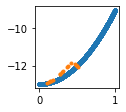

32/32 [==============================] - 1s 26ms/step - gen_loss: 0.6908 - disc_loss: 0.6909
Epoch 14002/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6931 - disc_loss: 0.6909
Epoch 14003/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6963 - disc_loss: 0.6912
Epoch 14004/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6983 - disc_loss: 0.6915
Epoch 14005/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7015 - disc_loss: 0.6919
Epoch 14006/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7042 - disc_loss: 0.6918
Epoch 14007/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7067 - disc_loss: 0.6915
Epoch 14008/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7111 - disc_loss: 0.6907
Epoch 14009/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7149 - disc_loss: 0.6895
Epoch 14010/20000
32/32

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6826 - disc_loss: 0.6983
Epoch 14076/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6796 - disc_loss: 0.6982
Epoch 14077/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6789 - disc_loss: 0.6967
Epoch 14078/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6802 - disc_loss: 0.6944
Epoch 14079/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6816 - disc_loss: 0.6928
Epoch 14080/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6840 - disc_loss: 0.6907
Epoch 14081/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6866 - disc_loss: 0.6891
Epoch 14082/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6884 - disc_loss: 0.6880
Epoch 14083/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6906 - disc_loss: 0.6878
Epoch 14084/20000
32/32 

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6924 - disc_loss: 0.7139
Epoch 14150/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7023 - disc_loss: 0.7118
Epoch 14151/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7183 - disc_loss: 0.7043
Epoch 14152/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7391 - disc_loss: 0.6929
Epoch 14153/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7560 - disc_loss: 0.6776
Epoch 14154/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6690 - disc_loss: 0.6353
Epoch 14155/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6783 - disc_loss: 0.6080
Epoch 14156/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7825 - disc_loss: 0.7062
Epoch 14157/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7160 - disc_loss: 0.7304
Epoch 14158/20000
32/

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6865 - disc_loss: 0.6943
Epoch 14224/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6855 - disc_loss: 0.6940
Epoch 14225/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6851 - disc_loss: 0.6936
Epoch 14226/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6855 - disc_loss: 0.6929
Epoch 14227/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6868 - disc_loss: 0.6922
Epoch 14228/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6871 - disc_loss: 0.6918
Epoch 14229/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6875 - disc_loss: 0.6915
Epoch 14230/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6898 - disc_loss: 0.6914
Epoch 14231/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6895 - disc_loss: 0.6916
Epoch 14232/20000
32/32 [=

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7267 - disc_loss: 0.7016
Epoch 14298/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7439 - disc_loss: 0.6949
Epoch 14299/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7517 - disc_loss: 0.6877
Epoch 14300/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7405 - disc_loss: 0.6840
Epoch 14301/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7312 - disc_loss: 0.6856
Epoch 14302/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7164 - disc_loss: 0.6907
Epoch 14303/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6936 - disc_loss: 0.6931
Epoch 14304/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6877 - disc_loss: 0.6944
Epoch 14305/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6856 - disc_loss: 0.6947
Epoch 14306/20000
32/3

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7005 - disc_loss: 0.6953
Epoch 14372/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7047 - disc_loss: 0.6965
Epoch 14373/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7139 - disc_loss: 0.6958
Epoch 14374/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7221 - disc_loss: 0.6936
Epoch 14375/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7246 - disc_loss: 0.6909
Epoch 14376/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7217 - disc_loss: 0.6891
Epoch 14377/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.7146 - disc_loss: 0.6897
Epoch 14378/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7020 - disc_loss: 0.6916
Epoch 14379/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6917 - disc_loss: 0.6951
Epoch 14380/20000
32/

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6700 - disc_loss: 0.6983
Epoch 14446/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6678 - disc_loss: 0.6968
Epoch 14447/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6676 - disc_loss: 0.6945
Epoch 14448/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6691 - disc_loss: 0.6922
Epoch 14449/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6712 - disc_loss: 0.6901
Epoch 14450/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6734 - disc_loss: 0.6883
Epoch 14451/20000
32/32 [==============================] - 0s 14ms/step - gen_loss: 0.6763 - disc_loss: 0.6875
Epoch 14452/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6815 - disc_loss: 0.6877
Epoch 14453/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6839 - disc_loss: 0.6886
Epoch 14454/20000
32/

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6808 - disc_loss: 0.6934
Epoch 14520/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6816 - disc_loss: 0.6922
Epoch 14521/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6817 - disc_loss: 0.6907
Epoch 14522/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6842 - disc_loss: 0.6890
Epoch 14523/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6850 - disc_loss: 0.6876
Epoch 14524/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6874 - disc_loss: 0.6867
Epoch 14525/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6881 - disc_loss: 0.6862
Epoch 14526/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6900 - disc_loss: 0.6868
Epoch 14527/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6906 - disc_loss: 0.6881
Epoch 14528/20000
32

32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7057 - disc_loss: 0.6906
Epoch 14594/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6974 - disc_loss: 0.6937
Epoch 14595/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6895 - disc_loss: 0.6962
Epoch 14596/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6838 - disc_loss: 0.6979
Epoch 14597/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6803 - disc_loss: 0.6982
Epoch 14598/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6788 - disc_loss: 0.6981
Epoch 14599/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6757 - disc_loss: 0.6977
Epoch 14600/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6761 - disc_loss: 0.6969
Epoch 14601/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6756 - disc_loss: 0.6950
Epoch 14602/20000
3

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6931 - disc_loss: 0.6929
Epoch 14668/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6979 - disc_loss: 0.6947
Epoch 14669/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7042 - disc_loss: 0.6953
Epoch 14670/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7097 - disc_loss: 0.6939
Epoch 14671/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7140 - disc_loss: 0.6911
Epoch 14672/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.7120 - disc_loss: 0.6888
Epoch 14673/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7054 - disc_loss: 0.6891
Epoch 14674/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6959 - disc_loss: 0.6923
Epoch 14675/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6868 - disc_loss: 0.6966
Epoch 14676/20000
32/3

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.7119 - disc_loss: 0.6859
Epoch 14742/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.7002 - disc_loss: 0.6897
Epoch 14743/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6860 - disc_loss: 0.6953
Epoch 14744/20000
32/32 [==============================] - 0s 13ms/step - gen_loss: 0.6669 - disc_loss: 0.7028
Epoch 14745/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.6482 - disc_loss: 0.7028
Epoch 14746/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6574 - disc_loss: 0.6878
Epoch 14747/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6944 - disc_loss: 0.6772
Epoch 14748/20000
32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7026 - disc_loss: 0.6956
Epoch 14749/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6919 - disc_loss: 0.7071
Epoch 14750/20000
32/3

32/32 [==============================] - 0s 11ms/step - gen_loss: 0.7014 - disc_loss: 0.6900
Epoch 14816/20000
32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6718 - disc_loss: 0.7054
Epoch 14817/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6580 - disc_loss: 0.7079
Epoch 14818/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6605 - disc_loss: 0.7032
Epoch 14819/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6762 - disc_loss: 0.6924
Epoch 14820/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6915 - disc_loss: 0.6873
Epoch 14821/20000
32/32 [==============================] - 0s 12ms/step - gen_loss: 0.6930 - disc_loss: 0.6920
Epoch 14822/20000
32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6921 - disc_loss: 0.6995
Epoch 14823/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6969 - disc_loss: 0.7027
Epoch 14824/20000
32/32 

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7282 - disc_loss: 0.6952
Epoch 14890/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7307 - disc_loss: 0.6893
Epoch 14891/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7256 - disc_loss: 0.6868
Epoch 14892/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7170 - disc_loss: 0.6871
Epoch 14893/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7042 - disc_loss: 0.6899
Epoch 14894/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6897 - disc_loss: 0.6947
Epoch 14895/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6720 - disc_loss: 0.6991
Epoch 14896/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6586 - disc_loss: 0.7018
Epoch 14897/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6485 - disc_loss: 0.7004
Epoch 14898/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6917 - disc_loss: 0.6945
Epoch 14964/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6850 - disc_loss: 0.6970
Epoch 14965/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6793 - disc_loss: 0.6985
Epoch 14966/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6717 - disc_loss: 0.6969
Epoch 14967/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6735 - disc_loss: 0.6931
Epoch 14968/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6859 - disc_loss: 0.6900
Epoch 14969/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6962 - disc_loss: 0.6896
Epoch 14970/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6981 - disc_loss: 0.6897
Epoch 14971/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6990 - disc_loss: 0.6904
Epoch 14972/20000
32/32 [===

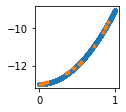

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6906 - disc_loss: 0.6933
Epoch 15002/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7158 - disc_loss: 0.6927
Epoch 15003/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7050 - disc_loss: 0.6915
Epoch 15004/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6913 - disc_loss: 0.6937
Epoch 15005/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6875 - disc_loss: 0.6949
Epoch 15006/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6877 - disc_loss: 0.6951
Epoch 15007/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6902 - disc_loss: 0.6945
Epoch 15008/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6928 - disc_loss: 0.6938
Epoch 15009/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6935
Epoch 15010/20000
32/32 [==

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6898 - disc_loss: 0.6913
Epoch 15076/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6910 - disc_loss: 0.6921
Epoch 15077/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6917 - disc_loss: 0.6940
Epoch 15078/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6967
Epoch 15079/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7025 - disc_loss: 0.6972
Epoch 15080/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7122 - disc_loss: 0.6928
Epoch 15081/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7161 - disc_loss: 0.6876
Epoch 15082/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7045 - disc_loss: 0.6879
Epoch 15083/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6916 - disc_loss: 0.6923
Epoch 15084/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6894 - disc_loss: 0.6913
Epoch 15150/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6874 - disc_loss: 0.6810
Epoch 15151/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7347 - disc_loss: 0.6922
Epoch 15152/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7144 - disc_loss: 0.6905
Epoch 15153/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7116 - disc_loss: 0.6887
Epoch 15154/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6994 - disc_loss: 0.6895
Epoch 15155/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6907 - disc_loss: 0.6916
Epoch 15156/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6821 - disc_loss: 0.6922
Epoch 15157/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6810 - disc_loss: 0.6911
Epoch 15158/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6852 - disc_loss: 0.6948
Epoch 15224/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6851 - disc_loss: 0.6941
Epoch 15225/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6860 - disc_loss: 0.6930
Epoch 15226/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6873 - disc_loss: 0.6920
Epoch 15227/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6883 - disc_loss: 0.6914
Epoch 15228/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6893 - disc_loss: 0.6906
Epoch 15229/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6918 - disc_loss: 0.6903
Epoch 15230/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6907
Epoch 15231/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6942 - disc_loss: 0.6910
Epoch 15232/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6905 - disc_loss: 0.6948
Epoch 15298/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6933 - disc_loss: 0.6940
Epoch 15299/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6933 - disc_loss: 0.6936
Epoch 15300/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6928
Epoch 15301/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6943 - disc_loss: 0.6924
Epoch 15302/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6965 - disc_loss: 0.6919
Epoch 15303/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6965 - disc_loss: 0.6918
Epoch 15304/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6977 - disc_loss: 0.6916
Epoch 15305/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6971 - disc_loss: 0.6919
Epoch 15306/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6914 - disc_loss: 0.6934
Epoch 15372/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6917 - disc_loss: 0.6929
Epoch 15373/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6933 - disc_loss: 0.6923
Epoch 15374/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6947 - disc_loss: 0.6922
Epoch 15375/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6948 - disc_loss: 0.6932
Epoch 15376/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6936
Epoch 15377/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6948 - disc_loss: 0.6933
Epoch 15378/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6956 - disc_loss: 0.6930
Epoch 15379/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6960 - disc_loss: 0.6923
Epoch 15380/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6842 - disc_loss: 0.6936
Epoch 15446/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6884 - disc_loss: 0.6918
Epoch 15447/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6913
Epoch 15448/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6942
Epoch 15449/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7070 - disc_loss: 0.6939
Epoch 15450/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7101 - disc_loss: 0.6917
Epoch 15451/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7034 - disc_loss: 0.6917
Epoch 15452/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6907 - disc_loss: 0.6940
Epoch 15453/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6795 - disc_loss: 0.6961
Epoch 15454/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6962 - disc_loss: 0.6929
Epoch 15520/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6957 - disc_loss: 0.6929
Epoch 15521/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6946 - disc_loss: 0.6929
Epoch 15522/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6932
Epoch 15523/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6910 - disc_loss: 0.6934
Epoch 15524/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6906 - disc_loss: 0.6934
Epoch 15525/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6904 - disc_loss: 0.6932
Epoch 15526/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6914 - disc_loss: 0.6930
Epoch 15527/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6927 - disc_loss: 0.6932
Epoch 15528/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6888 - disc_loss: 0.6938
Epoch 15594/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6845 - disc_loss: 0.6939
Epoch 15595/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6844 - disc_loss: 0.6933
Epoch 15596/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6870 - disc_loss: 0.6931
Epoch 15597/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6938
Epoch 15598/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7025 - disc_loss: 0.6942
Epoch 15599/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7100 - disc_loss: 0.6930
Epoch 15600/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7044 - disc_loss: 0.6922
Epoch 15601/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6912 - disc_loss: 0.6936
Epoch 15602/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6861 - disc_loss: 0.6886
Epoch 15668/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6913 - disc_loss: 0.6893
Epoch 15669/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6937 - disc_loss: 0.6925
Epoch 15670/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6961 - disc_loss: 0.6961
Epoch 15671/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7024 - disc_loss: 0.6967
Epoch 15672/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7135 - disc_loss: 0.6934
Epoch 15673/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7173 - disc_loss: 0.6913
Epoch 15674/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7121 - disc_loss: 0.6913
Epoch 15675/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7008 - disc_loss: 0.6925
Epoch 15676/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6751 - disc_loss: 0.6965
Epoch 15742/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6760 - disc_loss: 0.6943
Epoch 15743/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6813 - disc_loss: 0.6911
Epoch 15744/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7039 - disc_loss: 0.6877
Epoch 15745/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6868 - disc_loss: 0.6982
Epoch 15746/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6708 - disc_loss: 0.6992
Epoch 15747/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7009 - disc_loss: 0.6941
Epoch 15748/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7118 - disc_loss: 0.6920
Epoch 15749/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7121 - disc_loss: 0.6911
Epoch 15750/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7029 - disc_loss: 0.6901
Epoch 15816/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7464 - disc_loss: 0.6815
Epoch 15817/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7083 - disc_loss: 0.6930
Epoch 15818/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6538 - disc_loss: 0.7011
Epoch 15819/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6728 - disc_loss: 0.6941
Epoch 15820/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6978 - disc_loss: 0.6913
Epoch 15821/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7046 - disc_loss: 0.6906
Epoch 15822/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7034 - disc_loss: 0.6913
Epoch 15823/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7000 - disc_loss: 0.6921
Epoch 15824/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6945 - disc_loss: 0.6916
Epoch 15890/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6937 - disc_loss: 0.6929
Epoch 15891/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6920 - disc_loss: 0.6947
Epoch 15892/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6899 - disc_loss: 0.6955
Epoch 15893/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6943
Epoch 15894/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6920
Epoch 15895/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6926 - disc_loss: 0.6883
Epoch 15896/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6962 - disc_loss: 0.6920
Epoch 15897/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7064 - disc_loss: 0.6972
Epoch 15898/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6848 - disc_loss: 0.6994
Epoch 15964/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6975 - disc_loss: 0.6971
Epoch 15965/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7025 - disc_loss: 0.6923
Epoch 15966/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7079 - disc_loss: 0.6878
Epoch 15967/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7083 - disc_loss: 0.6861
Epoch 15968/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7025 - disc_loss: 0.6879
Epoch 15969/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6959 - disc_loss: 0.6914
Epoch 15970/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6903 - disc_loss: 0.6955
Epoch 15971/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6844 - disc_loss: 0.6982
Epoch 15972/20000
32/32 [===

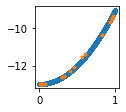

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6944 - disc_loss: 0.6957
Epoch 16002/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6921 - disc_loss: 0.6950
Epoch 16003/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6937
Epoch 16004/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6944 - disc_loss: 0.6924
Epoch 16005/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6976 - disc_loss: 0.6917
Epoch 16006/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7054 - disc_loss: 0.6910
Epoch 16007/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6927 - disc_loss: 0.6954
Epoch 16008/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6806 - disc_loss: 0.6962
Epoch 16009/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6901 - disc_loss: 0.6941
Epoch 16010/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7001 - disc_loss: 0.6908
Epoch 16076/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7002 - disc_loss: 0.6904
Epoch 16077/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6974 - disc_loss: 0.6911
Epoch 16078/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6947 - disc_loss: 0.6927
Epoch 16079/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6920 - disc_loss: 0.6940
Epoch 16080/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6897 - disc_loss: 0.6951
Epoch 16081/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6884 - disc_loss: 0.6954
Epoch 16082/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6886 - disc_loss: 0.6952
Epoch 16083/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6902 - disc_loss: 0.6940
Epoch 16084/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6944 - disc_loss: 0.6931
Epoch 16150/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6938
Epoch 16151/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6902 - disc_loss: 0.6944
Epoch 16152/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6891 - disc_loss: 0.6951
Epoch 16153/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6889 - disc_loss: 0.6951
Epoch 16154/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6914 - disc_loss: 0.6938
Epoch 16155/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6976 - disc_loss: 0.6910
Epoch 16156/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7242 - disc_loss: 0.6861
Epoch 16157/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6649 - disc_loss: 0.7023
Epoch 16158/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7107 - disc_loss: 0.6903
Epoch 16224/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7090 - disc_loss: 0.6893
Epoch 16225/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7053 - disc_loss: 0.6900
Epoch 16226/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6998 - disc_loss: 0.6916
Epoch 16227/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6936 - disc_loss: 0.6936
Epoch 16228/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6885 - disc_loss: 0.6950
Epoch 16229/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6844 - disc_loss: 0.6964
Epoch 16230/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6820 - disc_loss: 0.6967
Epoch 16231/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6815 - disc_loss: 0.6962
Epoch 16232/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7001 - disc_loss: 0.6887
Epoch 16298/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6888 - disc_loss: 0.6934
Epoch 16299/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6869 - disc_loss: 0.6970
Epoch 16300/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6970 - disc_loss: 0.6940
Epoch 16301/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7007 - disc_loss: 0.6924
Epoch 16302/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6981 - disc_loss: 0.6925
Epoch 16303/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6934 - disc_loss: 0.6934
Epoch 16304/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6912 - disc_loss: 0.6939
Epoch 16305/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6894 - disc_loss: 0.6938
Epoch 16306/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6895 - disc_loss: 0.6934
Epoch 16372/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6883 - disc_loss: 0.6936
Epoch 16373/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6882 - disc_loss: 0.6936
Epoch 16374/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6884 - disc_loss: 0.6931
Epoch 16375/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6887 - disc_loss: 0.6927
Epoch 16376/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6893 - disc_loss: 0.6922
Epoch 16377/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6900 - disc_loss: 0.6918
Epoch 16378/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6906 - disc_loss: 0.6917
Epoch 16379/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6913 - disc_loss: 0.6919
Epoch 16380/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6894 - disc_loss: 0.6955
Epoch 16446/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6878 - disc_loss: 0.6958
Epoch 16447/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6883 - disc_loss: 0.6946
Epoch 16448/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6900 - disc_loss: 0.6932
Epoch 16449/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6923 - disc_loss: 0.6917
Epoch 16450/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6946 - disc_loss: 0.6910
Epoch 16451/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6992 - disc_loss: 0.6908
Epoch 16452/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6944 - disc_loss: 0.6941
Epoch 16453/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6871 - disc_loss: 0.6970
Epoch 16454/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6893 - disc_loss: 0.6927
Epoch 16520/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6894 - disc_loss: 0.6918
Epoch 16521/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6907 - disc_loss: 0.6908
Epoch 16522/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6926 - disc_loss: 0.6905
Epoch 16523/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6908
Epoch 16524/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6915
Epoch 16525/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6915 - disc_loss: 0.6930
Epoch 16526/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6915 - disc_loss: 0.6957
Epoch 16527/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6985
Epoch 16528/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6923 - disc_loss: 0.6935
Epoch 16594/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6902 - disc_loss: 0.6941
Epoch 16595/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6898 - disc_loss: 0.6938
Epoch 16596/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6918 - disc_loss: 0.6929
Epoch 16597/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6926
Epoch 16598/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6914 - disc_loss: 0.6943
Epoch 16599/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6941 - disc_loss: 0.6935
Epoch 16600/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6968 - disc_loss: 0.6926
Epoch 16601/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6947 - disc_loss: 0.6929
Epoch 16602/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6937 - disc_loss: 0.6921
Epoch 16668/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6924 - disc_loss: 0.6938
Epoch 16669/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6944 - disc_loss: 0.6934
Epoch 16670/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6957 - disc_loss: 0.6925
Epoch 16671/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6929
Epoch 16672/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6910 - disc_loss: 0.6941
Epoch 16673/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6900 - disc_loss: 0.6943
Epoch 16674/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6935 - disc_loss: 0.6923
Epoch 16675/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6935 - disc_loss: 0.6922
Epoch 16676/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6922 - disc_loss: 0.6936
Epoch 16742/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6907 - disc_loss: 0.6965
Epoch 16743/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6897 - disc_loss: 0.6994
Epoch 16744/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6914 - disc_loss: 0.6998
Epoch 16745/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6981 - disc_loss: 0.6952
Epoch 16746/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7077 - disc_loss: 0.6876
Epoch 16747/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7122 - disc_loss: 0.6821
Epoch 16748/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7050 - disc_loss: 0.6863
Epoch 16749/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6926 - disc_loss: 0.6948
Epoch 16750/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6939 - disc_loss: 0.6939
Epoch 16816/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6959 - disc_loss: 0.6942
Epoch 16817/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6981 - disc_loss: 0.6934
Epoch 16818/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7024 - disc_loss: 0.6912
Epoch 16819/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6984 - disc_loss: 0.6909
Epoch 16820/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6921 - disc_loss: 0.6940
Epoch 16821/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6892 - disc_loss: 0.6951
Epoch 16822/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6955 - disc_loss: 0.6922
Epoch 16823/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6916
Epoch 16824/20000
32/32 [===

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6933 - disc_loss: 0.6931
Epoch 16890/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6927 - disc_loss: 0.6933
Epoch 16891/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6933 - disc_loss: 0.6933
Epoch 16892/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6932 - disc_loss: 0.6933
Epoch 16893/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6934
Epoch 16894/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6932
Epoch 16895/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6936 - disc_loss: 0.6934
Epoch 16896/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6937 - disc_loss: 0.6932
Epoch 16897/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6932 - disc_loss: 0.6933
Epoch 16898/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6936
Epoch 16964/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6918 - disc_loss: 0.6937
Epoch 16965/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6932 - disc_loss: 0.6929
Epoch 16966/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6934
Epoch 16967/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6935 - disc_loss: 0.6935
Epoch 16968/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6929
Epoch 16969/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6933
Epoch 16970/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6919 - disc_loss: 0.6937
Epoch 16971/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6932
Epoch 16972/20000
32/32 [===

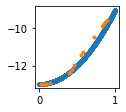

32/32 [==============================] - 0s 9ms/step - gen_loss: 0.6925 - disc_loss: 0.6935
Epoch 17002/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6923 - disc_loss: 0.6935
Epoch 17003/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6931
Epoch 17004/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6932 - disc_loss: 0.6931
Epoch 17005/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6934
Epoch 17006/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6936 - disc_loss: 0.6932
Epoch 17007/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6939 - disc_loss: 0.6929
Epoch 17008/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6934 - disc_loss: 0.6931
Epoch 17009/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6926 - disc_loss: 0.6935
Epoch 17010/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6936 - disc_loss: 0.6929
Epoch 17076/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6931 - disc_loss: 0.6933
Epoch 17077/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6931 - disc_loss: 0.6936
Epoch 17078/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6929 - disc_loss: 0.6942
Epoch 17079/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6940
Epoch 17080/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6934 - disc_loss: 0.6935
Epoch 17081/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6939 - disc_loss: 0.6932
Epoch 17082/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6941 - disc_loss: 0.6930
Epoch 17083/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6945 - disc_loss: 0.6927
Epoch 17084/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7478 - disc_loss: 0.6835
Epoch 17150/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7361 - disc_loss: 0.6837
Epoch 17151/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7192 - disc_loss: 0.6873
Epoch 17152/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6939 - disc_loss: 0.6953
Epoch 17153/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6649 - disc_loss: 0.6965
Epoch 17154/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6670 - disc_loss: 0.6929
Epoch 17155/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6817 - disc_loss: 0.6928
Epoch 17156/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6903 - disc_loss: 0.6928
Epoch 17157/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6964 - disc_loss: 0.6935
Epoch 17158/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6939 - disc_loss: 0.6931
Epoch 17224/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6941 - disc_loss: 0.6930
Epoch 17225/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6953 - disc_loss: 0.6930
Epoch 17226/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6963 - disc_loss: 0.6930
Epoch 17227/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6963 - disc_loss: 0.6929
Epoch 17228/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6952 - disc_loss: 0.6929
Epoch 17229/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6942 - disc_loss: 0.6931
Epoch 17230/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6935 - disc_loss: 0.6932
Epoch 17231/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6934
Epoch 17232/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6899 - disc_loss: 0.6935
Epoch 17298/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6891 - disc_loss: 0.6928
Epoch 17299/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6860 - disc_loss: 0.6925
Epoch 17300/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7135 - disc_loss: 0.6964
Epoch 17301/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6891 - disc_loss: 0.6949
Epoch 17302/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6903 - disc_loss: 0.6943
Epoch 17303/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6936
Epoch 17304/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6942 - disc_loss: 0.6928
Epoch 17305/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6959 - disc_loss: 0.6920
Epoch 17306/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6939 - disc_loss: 0.6927
Epoch 17372/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6933 - disc_loss: 0.6912
Epoch 17373/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6923 - disc_loss: 0.6901
Epoch 17374/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6968 - disc_loss: 0.6983
Epoch 17375/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6918 - disc_loss: 0.6954
Epoch 17376/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6942 - disc_loss: 0.6927
Epoch 17377/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6992 - disc_loss: 0.6906
Epoch 17378/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7012 - disc_loss: 0.6897
Epoch 17379/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6972 - disc_loss: 0.6925
Epoch 17380/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6942 - disc_loss: 0.6930
Epoch 17446/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6941 - disc_loss: 0.6929
Epoch 17447/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6941 - disc_loss: 0.6930
Epoch 17448/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6930
Epoch 17449/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6936 - disc_loss: 0.6931
Epoch 17450/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6926 - disc_loss: 0.6931
Epoch 17451/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6927 - disc_loss: 0.6932
Epoch 17452/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6915 - disc_loss: 0.6936
Epoch 17453/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6910 - disc_loss: 0.6933
Epoch 17454/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6949 - disc_loss: 0.6934
Epoch 17520/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6963 - disc_loss: 0.6931
Epoch 17521/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6972 - disc_loss: 0.6927
Epoch 17522/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6945 - disc_loss: 0.6930
Epoch 17523/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6898 - disc_loss: 0.6935
Epoch 17524/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6936 - disc_loss: 0.6931
Epoch 17525/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6910 - disc_loss: 0.6935
Epoch 17526/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6916 - disc_loss: 0.6934
Epoch 17527/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6932
Epoch 17528/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6945 - disc_loss: 0.6926
Epoch 17594/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6933
Epoch 17595/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6888 - disc_loss: 0.6951
Epoch 17596/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6890 - disc_loss: 0.6949
Epoch 17597/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6956 - disc_loss: 0.6929
Epoch 17598/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6974 - disc_loss: 0.6923
Epoch 17599/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6960 - disc_loss: 0.6924
Epoch 17600/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6919 - disc_loss: 0.6931
Epoch 17601/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6914 - disc_loss: 0.6934
Epoch 17602/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6917 - disc_loss: 0.6932
Epoch 17668/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6916 - disc_loss: 0.6930
Epoch 17669/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6918 - disc_loss: 0.6928
Epoch 17670/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6927
Epoch 17671/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6929
Epoch 17672/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6934 - disc_loss: 0.6934
Epoch 17673/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6948 - disc_loss: 0.6937
Epoch 17674/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6958 - disc_loss: 0.6932
Epoch 17675/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6971 - disc_loss: 0.6924
Epoch 17676/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6908 - disc_loss: 0.6937
Epoch 17742/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6906 - disc_loss: 0.6937
Epoch 17743/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6903 - disc_loss: 0.6935
Epoch 17744/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6909 - disc_loss: 0.6934
Epoch 17745/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6910 - disc_loss: 0.6932
Epoch 17746/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6913 - disc_loss: 0.6931
Epoch 17747/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6916 - disc_loss: 0.6930
Epoch 17748/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6917 - disc_loss: 0.6929
Epoch 17749/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6918 - disc_loss: 0.6928
Epoch 17750/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6599 - disc_loss: 0.6942
Epoch 17816/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6714 - disc_loss: 0.6917
Epoch 17817/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6783 - disc_loss: 0.6916
Epoch 17818/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6856 - disc_loss: 0.6932
Epoch 17819/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6946 - disc_loss: 0.6948
Epoch 17820/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7028 - disc_loss: 0.6954
Epoch 17821/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7111 - disc_loss: 0.6949
Epoch 17822/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7175 - disc_loss: 0.6933
Epoch 17823/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7169 - disc_loss: 0.6917
Epoch 17824/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7198 - disc_loss: 0.6815
Epoch 17890/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7048 - disc_loss: 0.6818
Epoch 17891/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6931 - disc_loss: 0.6897
Epoch 17892/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6972 - disc_loss: 0.6953
Epoch 17893/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7098 - disc_loss: 0.6985
Epoch 17894/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7222 - disc_loss: 0.6987
Epoch 17895/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7272 - disc_loss: 0.6976
Epoch 17896/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7346 - disc_loss: 0.6948
Epoch 17897/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7395 - disc_loss: 0.6922
Epoch 17898/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6921 - disc_loss: 0.6930
Epoch 17964/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6925
Epoch 17965/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6871 - disc_loss: 0.6925
Epoch 17966/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6799 - disc_loss: 0.6924
Epoch 17967/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6824 - disc_loss: 0.6925
Epoch 17968/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6818 - disc_loss: 0.6924
Epoch 17969/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6872 - disc_loss: 0.6929
Epoch 17970/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6932
Epoch 17971/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6945 - disc_loss: 0.6935
Epoch 17972/20000
32/32 [===

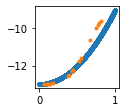

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.7021 - disc_loss: 0.6938
Epoch 18002/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7062 - disc_loss: 0.6933
Epoch 18003/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7041 - disc_loss: 0.6926
Epoch 18004/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7022 - disc_loss: 0.6921
Epoch 18005/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7027 - disc_loss: 0.6920
Epoch 18006/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7006 - disc_loss: 0.6922
Epoch 18007/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6975 - disc_loss: 0.6927
Epoch 18008/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6968 - disc_loss: 0.6931
Epoch 18009/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6875 - disc_loss: 0.6937
Epoch 18010/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7119 - disc_loss: 0.6905
Epoch 18076/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.7060 - disc_loss: 0.6920
Epoch 18077/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.7057 - disc_loss: 0.6901
Epoch 18078/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6907 - disc_loss: 0.6947
Epoch 18079/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6712 - disc_loss: 0.6924
Epoch 18080/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6981 - disc_loss: 0.6902
Epoch 18081/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6839 - disc_loss: 0.6950
Epoch 18082/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6941 - disc_loss: 0.6941
Epoch 18083/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6843 - disc_loss: 0.6958
Epoch 18084/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7016 - disc_loss: 0.6915
Epoch 18150/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6803 - disc_loss: 0.6950
Epoch 18151/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6836 - disc_loss: 0.6917
Epoch 18152/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6955 - disc_loss: 0.6916
Epoch 18153/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6973 - disc_loss: 0.6928
Epoch 18154/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6919 - disc_loss: 0.6943
Epoch 18155/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6847 - disc_loss: 0.6956
Epoch 18156/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6955 - disc_loss: 0.6916
Epoch 18157/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7241 - disc_loss: 0.6944
Epoch 18158/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6989 - disc_loss: 0.6931
Epoch 18224/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7034 - disc_loss: 0.6932
Epoch 18225/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7022 - disc_loss: 0.6931
Epoch 18226/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7026 - disc_loss: 0.6928
Epoch 18227/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7003 - disc_loss: 0.6929
Epoch 18228/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6952 - disc_loss: 0.6931
Epoch 18229/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6865 - disc_loss: 0.6941
Epoch 18230/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6847 - disc_loss: 0.6945
Epoch 18231/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6835 - disc_loss: 0.6939
Epoch 18232/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7112 - disc_loss: 0.6947
Epoch 18298/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7204 - disc_loss: 0.6884
Epoch 18299/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7179 - disc_loss: 0.6856
Epoch 18300/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7068 - disc_loss: 0.6875
Epoch 18301/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6920 - disc_loss: 0.6939
Epoch 18302/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6774 - disc_loss: 0.7011
Epoch 18303/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7211 - disc_loss: 0.6890
Epoch 18304/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7261 - disc_loss: 0.6877
Epoch 18305/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6630 - disc_loss: 0.7019
Epoch 18306/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6977 - disc_loss: 0.6851
Epoch 18372/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6900 - disc_loss: 0.6933
Epoch 18373/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6791 - disc_loss: 0.7050
Epoch 18374/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6690 - disc_loss: 0.7112
Epoch 18375/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6829 - disc_loss: 0.7038
Epoch 18376/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6986 - disc_loss: 0.6987
Epoch 18377/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6883 - disc_loss: 0.6901
Epoch 18378/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7162 - disc_loss: 0.6783
Epoch 18379/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7147 - disc_loss: 0.6848
Epoch 18380/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6940 - disc_loss: 0.6922
Epoch 18446/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6948 - disc_loss: 0.6923
Epoch 18447/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6957 - disc_loss: 0.6920
Epoch 18448/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6941 - disc_loss: 0.6922
Epoch 18449/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6932 - disc_loss: 0.6921
Epoch 18450/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6945 - disc_loss: 0.6917
Epoch 18451/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6961 - disc_loss: 0.6910
Epoch 18452/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6936 - disc_loss: 0.6920
Epoch 18453/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6890 - disc_loss: 0.6942
Epoch 18454/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7027 - disc_loss: 0.6929
Epoch 18520/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6877 - disc_loss: 0.7011
Epoch 18521/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6938 - disc_loss: 0.7021
Epoch 18522/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6958 - disc_loss: 0.6987
Epoch 18523/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7011 - disc_loss: 0.6943
Epoch 18524/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7041 - disc_loss: 0.6905
Epoch 18525/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7050 - disc_loss: 0.6885
Epoch 18526/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7034 - disc_loss: 0.6895
Epoch 18527/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6984 - disc_loss: 0.6929
Epoch 18528/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6904 - disc_loss: 0.6934
Epoch 18594/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6913 - disc_loss: 0.6942
Epoch 18595/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6921 - disc_loss: 0.6951
Epoch 18596/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6956
Epoch 18597/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6954 - disc_loss: 0.6953
Epoch 18598/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6975 - disc_loss: 0.6941
Epoch 18599/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6998 - disc_loss: 0.6927
Epoch 18600/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7012 - disc_loss: 0.6911
Epoch 18601/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7028 - disc_loss: 0.6899
Epoch 18602/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6994 - disc_loss: 0.6827
Epoch 18668/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6871 - disc_loss: 0.6897
Epoch 18669/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6835 - disc_loss: 0.6927
Epoch 18670/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6846 - disc_loss: 0.6921
Epoch 18671/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6886 - disc_loss: 0.6891
Epoch 18672/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6956 - disc_loss: 0.6838
Epoch 18673/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.7087 - disc_loss: 0.6810
Epoch 18674/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7380 - disc_loss: 0.6861
Epoch 18675/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7271 - disc_loss: 0.6957
Epoch 18676/20000
32/32 [===

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6938 - disc_loss: 0.6914
Epoch 18742/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6947 - disc_loss: 0.6911
Epoch 18743/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6962 - disc_loss: 0.6923
Epoch 18744/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6965 - disc_loss: 0.6935
Epoch 18745/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6945 - disc_loss: 0.6944
Epoch 18746/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6944 - disc_loss: 0.6939
Epoch 18747/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6955 - disc_loss: 0.6939
Epoch 18748/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6937 - disc_loss: 0.6938
Epoch 18749/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6914 - disc_loss: 0.6943
Epoch 18750/20000
32/32 [===

32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6929 - disc_loss: 0.6957
Epoch 18816/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6929 - disc_loss: 0.6946
Epoch 18817/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6932 - disc_loss: 0.6941
Epoch 18818/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6928 - disc_loss: 0.6936
Epoch 18819/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6923 - disc_loss: 0.6936
Epoch 18820/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6912 - disc_loss: 0.6937
Epoch 18821/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6902 - disc_loss: 0.6939
Epoch 18822/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6897 - disc_loss: 0.6939
Epoch 18823/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6895 - disc_loss: 0.6937
Epoch 18824/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6901 - disc_loss: 0.6960
Epoch 18890/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6888 - disc_loss: 0.6962
Epoch 18891/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6885 - disc_loss: 0.6958
Epoch 18892/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6889 - disc_loss: 0.6951
Epoch 18893/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6899 - disc_loss: 0.6941
Epoch 18894/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6914 - disc_loss: 0.6931
Epoch 18895/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6927 - disc_loss: 0.6919
Epoch 18896/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6952 - disc_loss: 0.6905
Epoch 18897/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7025 - disc_loss: 0.6873
Epoch 18898/20000
32/32 [===

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6887 - disc_loss: 0.6927
Epoch 18964/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6893 - disc_loss: 0.6925
Epoch 18965/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6890 - disc_loss: 0.6924
Epoch 18966/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6897 - disc_loss: 0.6928
Epoch 18967/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6896 - disc_loss: 0.6922
Epoch 18968/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6905 - disc_loss: 0.6924
Epoch 18969/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6886 - disc_loss: 0.6930
Epoch 18970/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6898 - disc_loss: 0.6932
Epoch 18971/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6886 - disc_loss: 0.6938
Epoch 18972/20000
32/32 [===

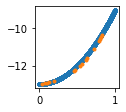

32/32 [==============================] - 0s 10ms/step - gen_loss: 0.6946 - disc_loss: 0.6940
Epoch 19002/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6952 - disc_loss: 0.6950
Epoch 19003/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6966 - disc_loss: 0.6953
Epoch 19004/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6976 - disc_loss: 0.6940
Epoch 19005/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6996 - disc_loss: 0.6929
Epoch 19006/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7005 - disc_loss: 0.6920
Epoch 19007/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7006 - disc_loss: 0.6916
Epoch 19008/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6988 - disc_loss: 0.6918
Epoch 19009/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6960 - disc_loss: 0.6926
Epoch 19010/20000
32/32 [==

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6922 - disc_loss: 0.6946
Epoch 19076/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6913 - disc_loss: 0.6951
Epoch 19077/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6916 - disc_loss: 0.6949
Epoch 19078/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6932 - disc_loss: 0.6940
Epoch 19079/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6955 - disc_loss: 0.6929
Epoch 19080/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6982 - disc_loss: 0.6918
Epoch 19081/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6991 - disc_loss: 0.6910
Epoch 19082/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6989 - disc_loss: 0.6911
Epoch 19083/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6966 - disc_loss: 0.6918
Epoch 19084/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6921 - disc_loss: 0.6929
Epoch 19150/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6930 - disc_loss: 0.6929
Epoch 19151/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6930 - disc_loss: 0.6927
Epoch 19152/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6921 - disc_loss: 0.6926
Epoch 19153/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6925
Epoch 19154/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6931 - disc_loss: 0.6924
Epoch 19155/20000
32/32 [==============================] - 0s 7ms/step - gen_loss: 0.6933 - disc_loss: 0.6923
Epoch 19156/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6938 - disc_loss: 0.6923
Epoch 19157/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6936 - disc_loss: 0.6923
Epoch 19158/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6882 - disc_loss: 0.6938
Epoch 19224/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6891 - disc_loss: 0.6931
Epoch 19225/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6902 - disc_loss: 0.6923
Epoch 19226/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6912 - disc_loss: 0.6916
Epoch 19227/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6926 - disc_loss: 0.6916
Epoch 19228/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6922
Epoch 19229/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6937 - disc_loss: 0.6937
Epoch 19230/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6940 - disc_loss: 0.6950
Epoch 19231/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6942 - disc_loss: 0.6952
Epoch 19232/20000
32/32 [===

32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6994 - disc_loss: 0.6919
Epoch 19298/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7045 - disc_loss: 0.6900
Epoch 19299/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7086 - disc_loss: 0.6864
Epoch 19300/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7036 - disc_loss: 0.6890
Epoch 19301/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6929 - disc_loss: 0.6930
Epoch 19302/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6869 - disc_loss: 0.6970
Epoch 19303/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6851 - disc_loss: 0.6989
Epoch 19304/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6839 - disc_loss: 0.6996
Epoch 19305/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6844 - disc_loss: 0.6988
Epoch 19306/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7585 - disc_loss: 0.6809
Epoch 19372/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7627 - disc_loss: 0.6700
Epoch 19373/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7605 - disc_loss: 0.6636
Epoch 19374/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7370 - disc_loss: 0.6683
Epoch 19375/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7212 - disc_loss: 0.6773
Epoch 19376/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7058 - disc_loss: 0.6889
Epoch 19377/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6872 - disc_loss: 0.7005
Epoch 19378/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6830 - disc_loss: 0.7056
Epoch 19379/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6761 - disc_loss: 0.7051
Epoch 19380/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6927 - disc_loss: 0.6931
Epoch 19446/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6938 - disc_loss: 0.6929
Epoch 19447/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6934 - disc_loss: 0.6931
Epoch 19448/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6925 - disc_loss: 0.6929
Epoch 19449/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6924 - disc_loss: 0.6928
Epoch 19450/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6941 - disc_loss: 0.6929
Epoch 19451/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6946 - disc_loss: 0.6928
Epoch 19452/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6937 - disc_loss: 0.6928
Epoch 19453/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6941 - disc_loss: 0.6928
Epoch 19454/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6912 - disc_loss: 0.6934
Epoch 19520/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6900 - disc_loss: 0.6942
Epoch 19521/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6911 - disc_loss: 0.6943
Epoch 19522/20000
32/32 [==============================] - 0s 8ms/step - gen_loss: 0.6950 - disc_loss: 0.6934
Epoch 19523/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7029 - disc_loss: 0.6933
Epoch 19524/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7009 - disc_loss: 0.6912
Epoch 19525/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6973 - disc_loss: 0.6914
Epoch 19526/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6912 - disc_loss: 0.6938
Epoch 19527/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6854 - disc_loss: 0.6947
Epoch 19528/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6968 - disc_loss: 0.6869
Epoch 19594/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6993 - disc_loss: 0.6871
Epoch 19595/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6949 - disc_loss: 0.6919
Epoch 19596/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6961 - disc_loss: 0.6969
Epoch 19597/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6968 - disc_loss: 0.7000
Epoch 19598/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6967 - disc_loss: 0.6972
Epoch 19599/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6986 - disc_loss: 0.6943
Epoch 19600/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7013 - disc_loss: 0.6914
Epoch 19601/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7059 - disc_loss: 0.6882
Epoch 19602/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6917 - disc_loss: 0.7000
Epoch 19668/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6977 - disc_loss: 0.6956
Epoch 19669/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7046 - disc_loss: 0.6900
Epoch 19670/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7093 - disc_loss: 0.6855
Epoch 19671/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7098 - disc_loss: 0.6837
Epoch 19672/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.7051 - disc_loss: 0.6857
Epoch 19673/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6974 - disc_loss: 0.6903
Epoch 19674/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6875 - disc_loss: 0.6970
Epoch 19675/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6804 - disc_loss: 0.7015
Epoch 19676/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6916 - disc_loss: 0.6950
Epoch 19742/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6892 - disc_loss: 0.6964
Epoch 19743/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6876 - disc_loss: 0.6974
Epoch 19744/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6870 - disc_loss: 0.6974
Epoch 19745/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6871 - disc_loss: 0.6968
Epoch 19746/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6885 - disc_loss: 0.6955
Epoch 19747/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6903 - disc_loss: 0.6937
Epoch 19748/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6926 - disc_loss: 0.6919
Epoch 19749/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.6945 - disc_loss: 0.6902
Epoch 19750/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6845 - disc_loss: 0.6977
Epoch 19816/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6828 - disc_loss: 0.6986
Epoch 19817/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6826 - disc_loss: 0.6982
Epoch 19818/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6920 - disc_loss: 0.6937
Epoch 19819/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7046 - disc_loss: 0.6865
Epoch 19820/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6979 - disc_loss: 0.6888
Epoch 19821/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6893 - disc_loss: 0.6960
Epoch 19822/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6846 - disc_loss: 0.6995
Epoch 19823/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6949 - disc_loss: 0.6935
Epoch 19824/20000
32/32 [===

32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6903 - disc_loss: 0.6949
Epoch 19890/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6884 - disc_loss: 0.6953
Epoch 19891/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6887 - disc_loss: 0.6945
Epoch 19892/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6914 - disc_loss: 0.6919
Epoch 19893/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6946 - disc_loss: 0.6889
Epoch 19894/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6955 - disc_loss: 0.6880
Epoch 19895/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6926 - disc_loss: 0.6908
Epoch 19896/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6891 - disc_loss: 0.6961
Epoch 19897/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6862 - disc_loss: 0.7022
Epoch 19898/20000
32/32 [===

32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6838 - disc_loss: 0.6976
Epoch 19964/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6782 - disc_loss: 0.6984
Epoch 19965/20000
32/32 [==============================] - 0s 6ms/step - gen_loss: 0.6890 - disc_loss: 0.6956
Epoch 19966/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6803 - disc_loss: 0.6950
Epoch 19967/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.6883 - disc_loss: 0.7009
Epoch 19968/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7013 - disc_loss: 0.7049
Epoch 19969/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7002 - disc_loss: 0.7028
Epoch 19970/20000
32/32 [==============================] - 0s 4ms/step - gen_loss: 0.7059 - disc_loss: 0.6939
Epoch 19971/20000
32/32 [==============================] - 0s 5ms/step - gen_loss: 0.7114 - disc_loss: 0.6860
Epoch 19972/20000
32/32 [===

In [14]:
gan.fit(x_train, epochs=20000, callbacks=[ShowImage(seed, 1000)])

In [15]:
gan.generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable para

In [16]:
gan.discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 3)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 2)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [17]:
a = _

In [18]:
a.history['gen_loss']

[0.6876142024993896,
 0.7174170017242432,
 0.7248952984809875,
 0.7334049940109253,
 0.7515486478805542,
 0.7706612944602966,
 0.7809618711471558,
 0.7758243083953857,
 0.7467178106307983,
 0.7006860971450806,
 0.654120922088623,
 0.6178046464920044,
 0.6006869077682495,
 0.6218437552452087,
 0.6466189026832581,
 0.663364589214325,
 0.6747490763664246,
 0.6826798319816589,
 0.6881183385848999,
 0.6921389102935791,
 0.6950823068618774,
 0.6974892616271973,
 0.6996407508850098,
 0.701603889465332,
 0.7034480571746826,
 0.7052677273750305,
 0.7068189978599548,
 0.707806408405304,
 0.7081050276756287,
 0.707420289516449,
 0.7053893208503723,
 0.7028899192810059,
 0.6988614797592163,
 0.6951499581336975,
 0.6920477747917175,
 0.6898891925811768,
 0.6878001093864441,
 0.6867056488990784,
 0.6855859756469727,
 0.6849291324615479,
 0.684657096862793,
 0.6848114728927612,
 0.6853172779083252,
 0.685812771320343,
 0.6864792704582214,
 0.6872371435165405,
 0.6879187226295471,
 0.6885702013969421,

In [19]:
gen = gan.generator(seed).numpy()
gen[:, 0] = (gen[:, 0] * (x_max - x_min)) + x_min
gen[:, 1] = (gen[:, 1] * (y_max - y_min)) + y_min

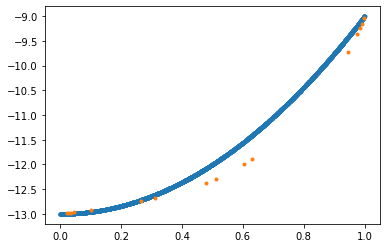

In [20]:
plt.plot(x_train_o[:, 0], x_train_o[:, 1], '.')
plt.plot(gen[:, 0], gen[:, 1], '.')

In [21]:
gan.discriminator(gan.generator(seed))#.numpy().max()

<tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[0.5126342 ],
       [0.4812752 ],
       [0.48423183],
       [0.48288095],
       [0.48015016],
       [0.4820126 ],
       [0.4804893 ],
       [0.48433706],
       [0.5143952 ],
       [0.51375383],
       [0.4855079 ],
       [0.48389152],
       [0.48452005],
       [0.51327044],
       [0.48411137],
       [0.510673  ]], dtype=float32)>

In [22]:
gan.discriminator(x_train)#.numpy().max()

TypeError: Inputs to a layer should be tensors. Got: <BatchDataset element_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)>

In [23]:
import glob # The glob module is used for Unix style pathname pattern expansion.
import imageio.v2 as imageio # The library that provides an easy interface to read and write a wide range of image data
from IPython.display import Image

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I', duration=0.25) as writer:
    filenames = glob.glob('images\image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
#         image = imageio.imread(filename)
#         writer.append_data(image)
  
display(Image(data=open('dcgan.gif', 'rb').read(), format='png'))

ModuleNotFoundError: No module named 'imageio.v2'